# Data Description

The dataset contains employment outcomes of engineering graduates, focusing on salary, job titles,
and locations, with around 4000 data points and 40 independent variables. It includes demographic 
features such as gender, date of birth, and college details like tier and specialization pursued.
Continuous variables like 10th and 12th grade percentages, college GPA, and standardized scores in
cognitive, technical, and personality skills are also provided. Categorical variables like college 
board, degree obtained, and job designation are included, alongside continuous scores in specific
technical domains like computer science and engineering. The dataset aims to analyze factors 
influencing engineering graduates' employment outcomes, including salary and job placement.






# Objective

The objective of this dataset is to analyze the employment outcomes of engineering graduates from 
the Aspiring Mind Employment Outcome 2015 (AMEO) study. By exploring factors such as salary,
job titles, and locations, along with demographic and academic details, the dataset aims to 
understand the relationship between various independent variables and graduates' employment success.
Through statistical analysis and data visualization, the objective is to identify trends, patterns,
and potential predictors that influence engineering graduates' job placement, salary levels, and
career trajectories.






# Import the Data

In [24]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime

In [2]:
df=pd.read_csv("C:\\Users\\hp\\Downloads\\data.xlsx - Sheet1.csv")

In [3]:
df.head()

Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...              -1              -1              -1          -1         -1   
2  ...              -1              -1              -1          -1         -1   
3  ...              -1              -1              -1          -1         -1   
4  ...              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [6]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [7]:
df.shape

(3998, 39)

In [8]:
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [9]:
df.dtypes

Unnamed: 0                object
ID                         int64
Salary                   float64
DOJ                       object
DOL                       object
Designation               object
JobCity                   object
Gender                    object
DOB                       object
10percentage             float64
10board                   object
12graduation               int64
12percentage             float64
12board                   object
CollegeID                  int64
CollegeTier                int64
Degree                    object
Specialization            object
collegeGPA               float64
CollegeCityID              int64
CollegeCityTier            int64
CollegeState              object
GraduationYear             int64
English                    int64
Logical                    int64
Quant                      int64
Domain                   float64
ComputerProgramming        int64
ElectronicsAndSemicon      int64
ComputerScience            int64
Mechanical

In [10]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

# Droping Unwanted Columns

In [11]:
df= df.drop(columns = ['Unnamed: 0', 'ID','CollegeID','CollegeCityID'])
df.head()

Salary          DOJ          DOL               Designation    JobCity  \
0   420000.0  6/1/12 0:00      present   senior quality engineer  Bangalore   
1   500000.0  9/1/13 0:00      present         assistant manager     Indore   
2   325000.0  6/1/14 0:00      present          systems engineer    Chennai   
3  1100000.0  7/1/11 0:00      present  senior software engineer    Gurgaon   
4   200000.0  3/1/14 0:00  3/1/15 0:00                       get    Manesar   

  Gender           DOB  10percentage                         10board  \
0      f  2/19/90 0:00          84.3  board ofsecondary education,ap   
1      m  10/4/89 0:00          85.4                            cbse   
2      f   8/3/92 0:00          85.0                            cbse   
3      m  12/5/89 0:00          85.6                            cbse   
4      m  2/27/91 0:00          78.0                            cbse   

   12graduation  ...  ComputerScience MechanicalEngg  ElectricalEngg  \
0          2007  ...               -1             -1              -1   
1          2007  ...               -1             -1              -1   
2          2010  ...               -1             -1              -1   
3          2007  ...               -1             -1              -1   
4          2008  ...               -1             -1              -1   

  TelecomEngg CivilEngg  conscientiousness  agreeableness extraversion  \
0          -1        -1             0.9737         0.8128       0.5269   
1          -1        -1            -0.7335         0.3789       1.2396   
2          -1        -1             0.2718         1.7109       0.1637   
3          -1        -1             0.0464         0.3448      -0.3440   
4          -1        -1            -0.8810        -0.2793      -1.0697   

   nueroticism  openess_to_experience  
0      1.35490                -0.4455  
1     -0.10760                 0.8637  
2     -0.86820                 0.6721  
3     -0.40780                -0.9194  
4      0.09163                -0.1295  

[5 rows x 35 columns]

# Datatypes Conversion


The survey was conducted back in 2015 and therefore making an assumption that the respondents who 
responded as present for DOL actually left the company within 2015 only. So, we will replace present
value in DOL with date.

Then we convert the datetype of DOJ and DOL to datetime.

In [12]:
categorical = ['Designation','JobCity', 'Gender','10board','12board','CollegeTier','Degree',
              'Specialization','CollegeCityTier','CollegeState']
for cat in categorical:
    df[cat] = df[cat].astype('category')

In [13]:
current_date = pd.to_datetime('today').date()
df['DOJ'] = df['DOJ'].replace('present', current_date)
df['DOL'] = df['DOL'].replace('present', current_date)

df['DOJ'] = pd.to_datetime(df['DOJ'], errors='coerce')
df['DOL'] = pd.to_datetime(df['DOL'], errors='coerce')
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

print(df[['DOJ', 'DOL', 'DOB']].dtypes)


DOJ    datetime64[ns]
DOL    datetime64[ns]
DOB    datetime64[ns]
dtype: object


# Feature engineering

Validating if there exist 0 or -1 in the data

In [14]:
print((df==0).sum()[(df==0).sum() > 0])


CollegeCityTier    2797
GraduationYear        1
dtype: int64


In [15]:
(df==-1).sum()[(df==-1).sum()>0]/len(df)*100

Domain                    6.153077
ComputerProgramming      21.710855
ElectronicsAndSemicon    71.385693
ComputerScience          77.438719
MechanicalEngg           94.122061
ElectricalEngg           95.972986
TelecomEngg              90.645323
CivilEngg                98.949475
dtype: float64

In [16]:
df = df.drop(columns = ['MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg'])
df.head()

Salary        DOJ        DOL               Designation    JobCity  \
0   420000.0 2012-06-01 2024-02-23   senior quality engineer  Bangalore   
1   500000.0 2013-09-01 2024-02-23         assistant manager     Indore   
2   325000.0 2014-06-01 2024-02-23          systems engineer    Chennai   
3  1100000.0 2011-07-01 2024-02-23  senior software engineer    Gurgaon   
4   200000.0 2014-03-01 2015-03-01                       get    Manesar   

  Gender        DOB  10percentage                         10board  \
0      f 1990-02-19          84.3  board ofsecondary education,ap   
1      m 1989-10-04          85.4                            cbse   
2      f 1992-08-03          85.0                            cbse   
3      m 1989-12-05          85.6                            cbse   
4      m 1991-02-27          78.0                            cbse   

   12graduation  ...  Quant    Domain ComputerProgramming  \
0          2007  ...    525  0.635979                 445   
1          2007  ...    780  0.960603                  -1   
2          2010  ...    370  0.450877                 395   
3          2007  ...    625  0.974396                 615   
4          2008  ...    465  0.124502                  -1   

  ElectronicsAndSemicon ComputerScience  conscientiousness agreeableness  \
0                    -1              -1             0.9737        0.8128   
1                   466              -1            -0.7335        0.3789   
2                    -1              -1             0.2718        1.7109   
3                    -1              -1             0.0464        0.3448   
4                   233              -1            -0.8810       -0.2793   

  extraversion  nueroticism  openess_to_experience  
0       0.5269      1.35490                -0.4455  
1       1.2396     -0.10760                 0.8637  
2       0.1637     -0.86820                 0.6721  
3      -0.3440     -0.40780                -0.9194  
4      -1.0697      0.09163                -0.1295  

[5 rows x 31 columns]

In [17]:
df['GraduationYear'].unique()

array([2011, 2012, 2014, 2016, 2013, 2010, 2015, 2009, 2017,    0, 2007],
      dtype=int64)

In [18]:
df['Domain'].value_counts()

-1.000000    246
 0.622643    113
 0.538387    110
 0.486747    106
 0.744758    103
            ... 
 0.999250      1
 0.010995      1
 0.639587      1
 0.031150      1
 0.938588      1
Name: Domain, Length: 243, dtype: int64

In [19]:
df['ComputerScience'].value_counts()

-1      3096
 407     128
 376     123
 346     118
 438     111
 469      80
 315      77
 500      64
 284      50
 530      45
 253      30
 561      22
 223      14
 592      14
 623      10
 653       9
 192       3
 715       2
 684       1
 130       1
Name: ComputerScience, dtype: int64

In [20]:
df['10board'].value_counts()

cbse                                                  1395
state board                                           1164
0                                                      350
icse                                                   281
ssc                                                    122
                                                      ... 
jharkhand secondary board                                1
jharkhand secondary education board                      1
jharkhand secondary examination board (ranchi)           1
jharkhand secondary examination board,ranchi             1
west bengal board of secondary examination (wbbse)       1
Name: 10board, Length: 275, dtype: int64

In [25]:
df['10board'] = df['10board'].replace({'0':np.nan})
df['12board'] = df['12board'].replace({'0':np.nan})
df['GraduationYear'] = df['GraduationYear'].replace({0:np.nan})
df['JobCity'] = df['JobCity'].replace({'-1':np.nan})
df['Domain'] = df['Domain'].replace({-1:np.nan})
df['ElectronicsAndSemicon'] = df['ElectronicsAndSemicon'].replace({-1:0})
df['ComputerScience'] = df['ComputerScience'].replace({-1:0})
df['ComputerProgramming'] = df['ComputerProgramming'].replace({-1:np.nan})

In [26]:
df.head()

Salary        DOJ        DOL               Designation    JobCity  \
0   420000.0 2012-06-01 2024-02-23   senior quality engineer  Bangalore   
1   500000.0 2013-09-01 2024-02-23         assistant manager     Indore   
2   325000.0 2014-06-01 2024-02-23          systems engineer    Chennai   
3  1100000.0 2011-07-01 2024-02-23  senior software engineer    Gurgaon   
4   200000.0 2014-03-01 2015-03-01                       get    Manesar   

  Gender        DOB  10percentage                         10board  \
0      f 1990-02-19          84.3  board ofsecondary education,ap   
1      m 1989-10-04          85.4                            cbse   
2      f 1992-08-03          85.0                            cbse   
3      m 1989-12-05          85.6                            cbse   
4      m 1991-02-27          78.0                            cbse   

   12graduation  ...  Quant    Domain ComputerProgramming  \
0          2007  ...    525  0.635979               445.0   
1          2007  ...    780  0.960603                 NaN   
2          2010  ...    370  0.450877               395.0   
3          2007  ...    625  0.974396               615.0   
4          2008  ...    465  0.124502                 NaN   

  ElectronicsAndSemicon ComputerScience  conscientiousness agreeableness  \
0                     0               0             0.9737        0.8128   
1                   466               0            -0.7335        0.3789   
2                     0               0             0.2718        1.7109   
3                     0               0             0.0464        0.3448   
4                   233               0            -0.8810       -0.2793   

  extraversion  nueroticism  openess_to_experience  
0       0.5269      1.35490                -0.4455  
1       1.2396     -0.10760                 0.8637  
2       0.1637     -0.86820                 0.6721  
3      -0.3440     -0.40780                -0.9194  
4      -1.0697      0.09163                -0.1295  

[5 rows x 31 columns]

categorical columns imputing with mode values of their respective columns

In [27]:
df['10board'].fillna(df['10board'].mode()[0], inplace = True)
df['12board'].fillna(df['12board'].mode()[0], inplace = True)
df['GraduationYear'].fillna(df['GraduationYear'].mode()[0], inplace = True)
df['JobCity'].fillna(df['JobCity'].mode()[0], inplace = True)

df.head()


Salary        DOJ        DOL               Designation    JobCity  \
0   420000.0 2012-06-01 2024-02-23   senior quality engineer  Bangalore   
1   500000.0 2013-09-01 2024-02-23         assistant manager     Indore   
2   325000.0 2014-06-01 2024-02-23          systems engineer    Chennai   
3  1100000.0 2011-07-01 2024-02-23  senior software engineer    Gurgaon   
4   200000.0 2014-03-01 2015-03-01                       get    Manesar   

  Gender        DOB  10percentage                         10board  \
0      f 1990-02-19          84.3  board ofsecondary education,ap   
1      m 1989-10-04          85.4                            cbse   
2      f 1992-08-03          85.0                            cbse   
3      m 1989-12-05          85.6                            cbse   
4      m 1991-02-27          78.0                            cbse   

   12graduation  ...  Quant    Domain ComputerProgramming  \
0          2007  ...    525  0.635979               445.0   
1          2007  ...    780  0.960603                 NaN   
2          2010  ...    370  0.450877               395.0   
3          2007  ...    625  0.974396               615.0   
4          2008  ...    465  0.124502                 NaN   

  ElectronicsAndSemicon ComputerScience  conscientiousness agreeableness  \
0                     0               0             0.9737        0.8128   
1                   466               0            -0.7335        0.3789   
2                     0               0             0.2718        1.7109   
3                     0               0             0.0464        0.3448   
4                   233               0            -0.8810       -0.2793   

  extraversion  nueroticism  openess_to_experience  
0       0.5269      1.35490                -0.4455  
1       1.2396     -0.10760                 0.8637  
2       0.1637     -0.86820                 0.6721  
3      -0.3440     -0.40780                -0.9194  
4      -1.0697      0.09163                -0.1295  

[5 rows x 31 columns]

Numerical Columns imputing with median of their respective column

In [28]:
df['Domain'].fillna(df['Domain'].median(), inplace = True)
df['ComputerProgramming'].fillna(df['ComputerProgramming'].median(), inplace = True)
df.head()

Salary        DOJ        DOL               Designation    JobCity  \
0   420000.0 2012-06-01 2024-02-23   senior quality engineer  Bangalore   
1   500000.0 2013-09-01 2024-02-23         assistant manager     Indore   
2   325000.0 2014-06-01 2024-02-23          systems engineer    Chennai   
3  1100000.0 2011-07-01 2024-02-23  senior software engineer    Gurgaon   
4   200000.0 2014-03-01 2015-03-01                       get    Manesar   

  Gender        DOB  10percentage                         10board  \
0      f 1990-02-19          84.3  board ofsecondary education,ap   
1      m 1989-10-04          85.4                            cbse   
2      f 1992-08-03          85.0                            cbse   
3      m 1989-12-05          85.6                            cbse   
4      m 1991-02-27          78.0                            cbse   

   12graduation  ...  Quant    Domain ComputerProgramming  \
0          2007  ...    525  0.635979               445.0   
1          2007  ...    780  0.960603               455.0   
2          2010  ...    370  0.450877               395.0   
3          2007  ...    625  0.974396               615.0   
4          2008  ...    465  0.124502               455.0   

  ElectronicsAndSemicon ComputerScience  conscientiousness agreeableness  \
0                     0               0             0.9737        0.8128   
1                   466               0            -0.7335        0.3789   
2                     0               0             0.2718        1.7109   
3                     0               0             0.0464        0.3448   
4                   233               0            -0.8810       -0.2793   

  extraversion  nueroticism  openess_to_experience  
0       0.5269      1.35490                -0.4455  
1       1.2396     -0.10760                 0.8637  
2       0.1637     -0.86820                 0.6721  
3      -0.3440     -0.40780                -0.9194  
4      -1.0697      0.09163                -0.1295  

[5 rows x 31 columns]

Checking if the results are in percentages and not in CGPA or otherwise.

In [29]:
print((df['10percentage'] <=10).sum())
print((df['12percentage'] <=10).sum())
print((df['collegeGPA'] <=10).sum())

0
0
12


collegeGPA column have 12 observations which need to be deal 

In [30]:
df.loc[df['collegeGPA']<=10,'collegeGPA'].index

Int64Index([7, 138, 788, 1419, 1439, 1767, 2151, 2229, 2293, 2662, 2691, 3308], dtype='int64')

In [31]:
df.loc[df['collegeGPA']<=10,'collegeGPA'] = (df.loc[df['collegeGPA']<=10,'collegeGPA']/10)*100
df.head()

Salary        DOJ        DOL               Designation    JobCity  \
0   420000.0 2012-06-01 2024-02-23   senior quality engineer  Bangalore   
1   500000.0 2013-09-01 2024-02-23         assistant manager     Indore   
2   325000.0 2014-06-01 2024-02-23          systems engineer    Chennai   
3  1100000.0 2011-07-01 2024-02-23  senior software engineer    Gurgaon   
4   200000.0 2014-03-01 2015-03-01                       get    Manesar   

  Gender        DOB  10percentage                         10board  \
0      f 1990-02-19          84.3  board ofsecondary education,ap   
1      m 1989-10-04          85.4                            cbse   
2      f 1992-08-03          85.0                            cbse   
3      m 1989-12-05          85.6                            cbse   
4      m 1991-02-27          78.0                            cbse   

   12graduation  ...  Quant    Domain ComputerProgramming  \
0          2007  ...    525  0.635979               445.0   
1          2007  ...    780  0.960603               455.0   
2          2010  ...    370  0.450877               395.0   
3          2007  ...    625  0.974396               615.0   
4          2008  ...    465  0.124502               455.0   

  ElectronicsAndSemicon ComputerScience  conscientiousness agreeableness  \
0                     0               0             0.9737        0.8128   
1                   466               0            -0.7335        0.3789   
2                     0               0             0.2718        1.7109   
3                     0               0             0.0464        0.3448   
4                   233               0            -0.8810       -0.2793   

  extraversion  nueroticism  openess_to_experience  
0       0.5269      1.35490                -0.4455  
1       1.2396     -0.10760                 0.8637  
2       0.1637     -0.86820                 0.6721  
3      -0.3440     -0.40780                -0.9194  
4      -1.0697      0.09163                -0.1295  

[5 rows x 31 columns]

# Adding  Experience column by subtracting the DOL from DOJ

In [32]:
exp = (df['DOL'] - df['DOJ'])
Experience = np.zeros(len(df))
for i, date in enumerate(exp):
    Experience[i] = round(date.days/365,2)
df['Experience'] = Experience

In [33]:
df.head()

Salary        DOJ        DOL               Designation    JobCity  \
0   420000.0 2012-06-01 2024-02-23   senior quality engineer  Bangalore   
1   500000.0 2013-09-01 2024-02-23         assistant manager     Indore   
2   325000.0 2014-06-01 2024-02-23          systems engineer    Chennai   
3  1100000.0 2011-07-01 2024-02-23  senior software engineer    Gurgaon   
4   200000.0 2014-03-01 2015-03-01                       get    Manesar   

  Gender        DOB  10percentage                         10board  \
0      f 1990-02-19          84.3  board ofsecondary education,ap   
1      m 1989-10-04          85.4                            cbse   
2      f 1992-08-03          85.0                            cbse   
3      m 1989-12-05          85.6                            cbse   
4      m 1991-02-27          78.0                            cbse   

   12graduation  ...    Domain ComputerProgramming ElectronicsAndSemicon  \
0          2007  ...  0.635979               445.0                     0   
1          2007  ...  0.960603               455.0                   466   
2          2010  ...  0.450877               395.0                     0   
3          2007  ...  0.974396               615.0                     0   
4          2008  ...  0.124502               455.0                   233   

  ComputerScience conscientiousness  agreeableness extraversion nueroticism  \
0               0            0.9737         0.8128       0.5269     1.35490   
1               0           -0.7335         0.3789       1.2396    -0.10760   
2               0            0.2718         1.7109       0.1637    -0.86820   
3               0            0.0464         0.3448      -0.3440    -0.40780   
4               0           -0.8810        -0.2793      -1.0697     0.09163   

   openess_to_experience  Experience  
0                -0.4455       11.74  
1                 0.8637       10.48  
2                 0.6721        9.74  
3                -0.9194       12.66  
4                -0.1295        1.00  

[5 rows x 32 columns]

# Adding Age Column

In [34]:
df['DOB'] = pd.to_datetime(df['DOB'])
df['Age'] = 2015 - df['DOB'].dt.year
df.head()

Salary        DOJ        DOL               Designation    JobCity  \
0   420000.0 2012-06-01 2024-02-23   senior quality engineer  Bangalore   
1   500000.0 2013-09-01 2024-02-23         assistant manager     Indore   
2   325000.0 2014-06-01 2024-02-23          systems engineer    Chennai   
3  1100000.0 2011-07-01 2024-02-23  senior software engineer    Gurgaon   
4   200000.0 2014-03-01 2015-03-01                       get    Manesar   

  Gender        DOB  10percentage                         10board  \
0      f 1990-02-19          84.3  board ofsecondary education,ap   
1      m 1989-10-04          85.4                            cbse   
2      f 1992-08-03          85.0                            cbse   
3      m 1989-12-05          85.6                            cbse   
4      m 1991-02-27          78.0                            cbse   

   12graduation  ...  ComputerProgramming ElectronicsAndSemicon  \
0          2007  ...                445.0                     0   
1          2007  ...                455.0                   466   
2          2010  ...                395.0                     0   
3          2007  ...                615.0                     0   
4          2008  ...                455.0                   233   

  ComputerScience conscientiousness agreeableness  extraversion nueroticism  \
0               0            0.9737        0.8128        0.5269     1.35490   
1               0           -0.7335        0.3789        1.2396    -0.10760   
2               0            0.2718        1.7109        0.1637    -0.86820   
3               0            0.0464        0.3448       -0.3440    -0.40780   
4               0           -0.8810       -0.2793       -1.0697     0.09163   

  openess_to_experience  Experience  Age  
0               -0.4455       11.74   25  
1                0.8637       10.48   26  
2                0.6721        9.74   23  
3               -0.9194       12.66   26  
4               -0.1295        1.00   24  

[5 rows x 33 columns]

In [35]:
def correct_string_data(data):
    '''
    Convert the textual categories to lower case
    and remove the leading or trailing spaces if any.

    '''
    df[data] = df[data].str.lower().str.strip()

In [36]:
textual_columns = ['Designation','JobCity','10board','12board','Specialization','CollegeState']

In [37]:
for col in textual_columns:
    print(f'Number of unique values in {col} with inconsistency : {df[col].nunique()}')

Number of unique values in Designation with inconsistency : 419
Number of unique values in JobCity with inconsistency : 338
Number of unique values in 10board with inconsistency : 274
Number of unique values in 12board with inconsistency : 339
Number of unique values in Specialization with inconsistency : 46
Number of unique values in CollegeState with inconsistency : 26


In [38]:
for col in textual_columns:
    correct_string_data(col)
for col in textual_columns:
    print(f'Number of unique values in {col} without inconsistency : {df[col].nunique()}')

Number of unique values in Designation without inconsistency : 419
Number of unique values in JobCity without inconsistency : 231
Number of unique values in 10board without inconsistency : 272
Number of unique values in 12board without inconsistency : 336
Number of unique values in Specialization without inconsistency : 46
Number of unique values in CollegeState without inconsistency : 26


Keeping only the top 10 frequent categories and classifying others as other.

In [39]:
def collapsing_categories(df, data):
    for Designation in df[data].unique():
        min_count = df[data].value_counts()[:10].min()
        if df[df[data] == Designation][data].value_counts()[0] < min_count:
            df.loc[df[data] == Designation, data] = 'other'

In [40]:
for cols in textual_columns:
    collapsing_categories(df, cols)
for cols in textual_columns:
    print('')
    print('Top 10 categories in:', cols)
    print('')
    print(df[cols].value_counts())
    print('')
    print('*'*100)


Top 10 categories in: Designation

other                         2296
software engineer              539
software developer             265
system engineer                205
programmer analyst             139
systems engineer               118
java software engineer         111
software test engineer         100
project engineer                77
technical support engineer      76
senior software engineer        72
Name: Designation, dtype: int64

****************************************************************************************************

Top 10 categories in: JobCity

bangalore    1126
other         816
noida         389
hyderabad     368
pune          327
chennai       313
gurgaon       217
new delhi     204
kolkata       119
mumbai        119
Name: JobCity, dtype: int64

****************************************************************************************************

Top 10 categories in: 10board

cbse                            1746
state board                     11

# UNIVARIANT ANALYSIS

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

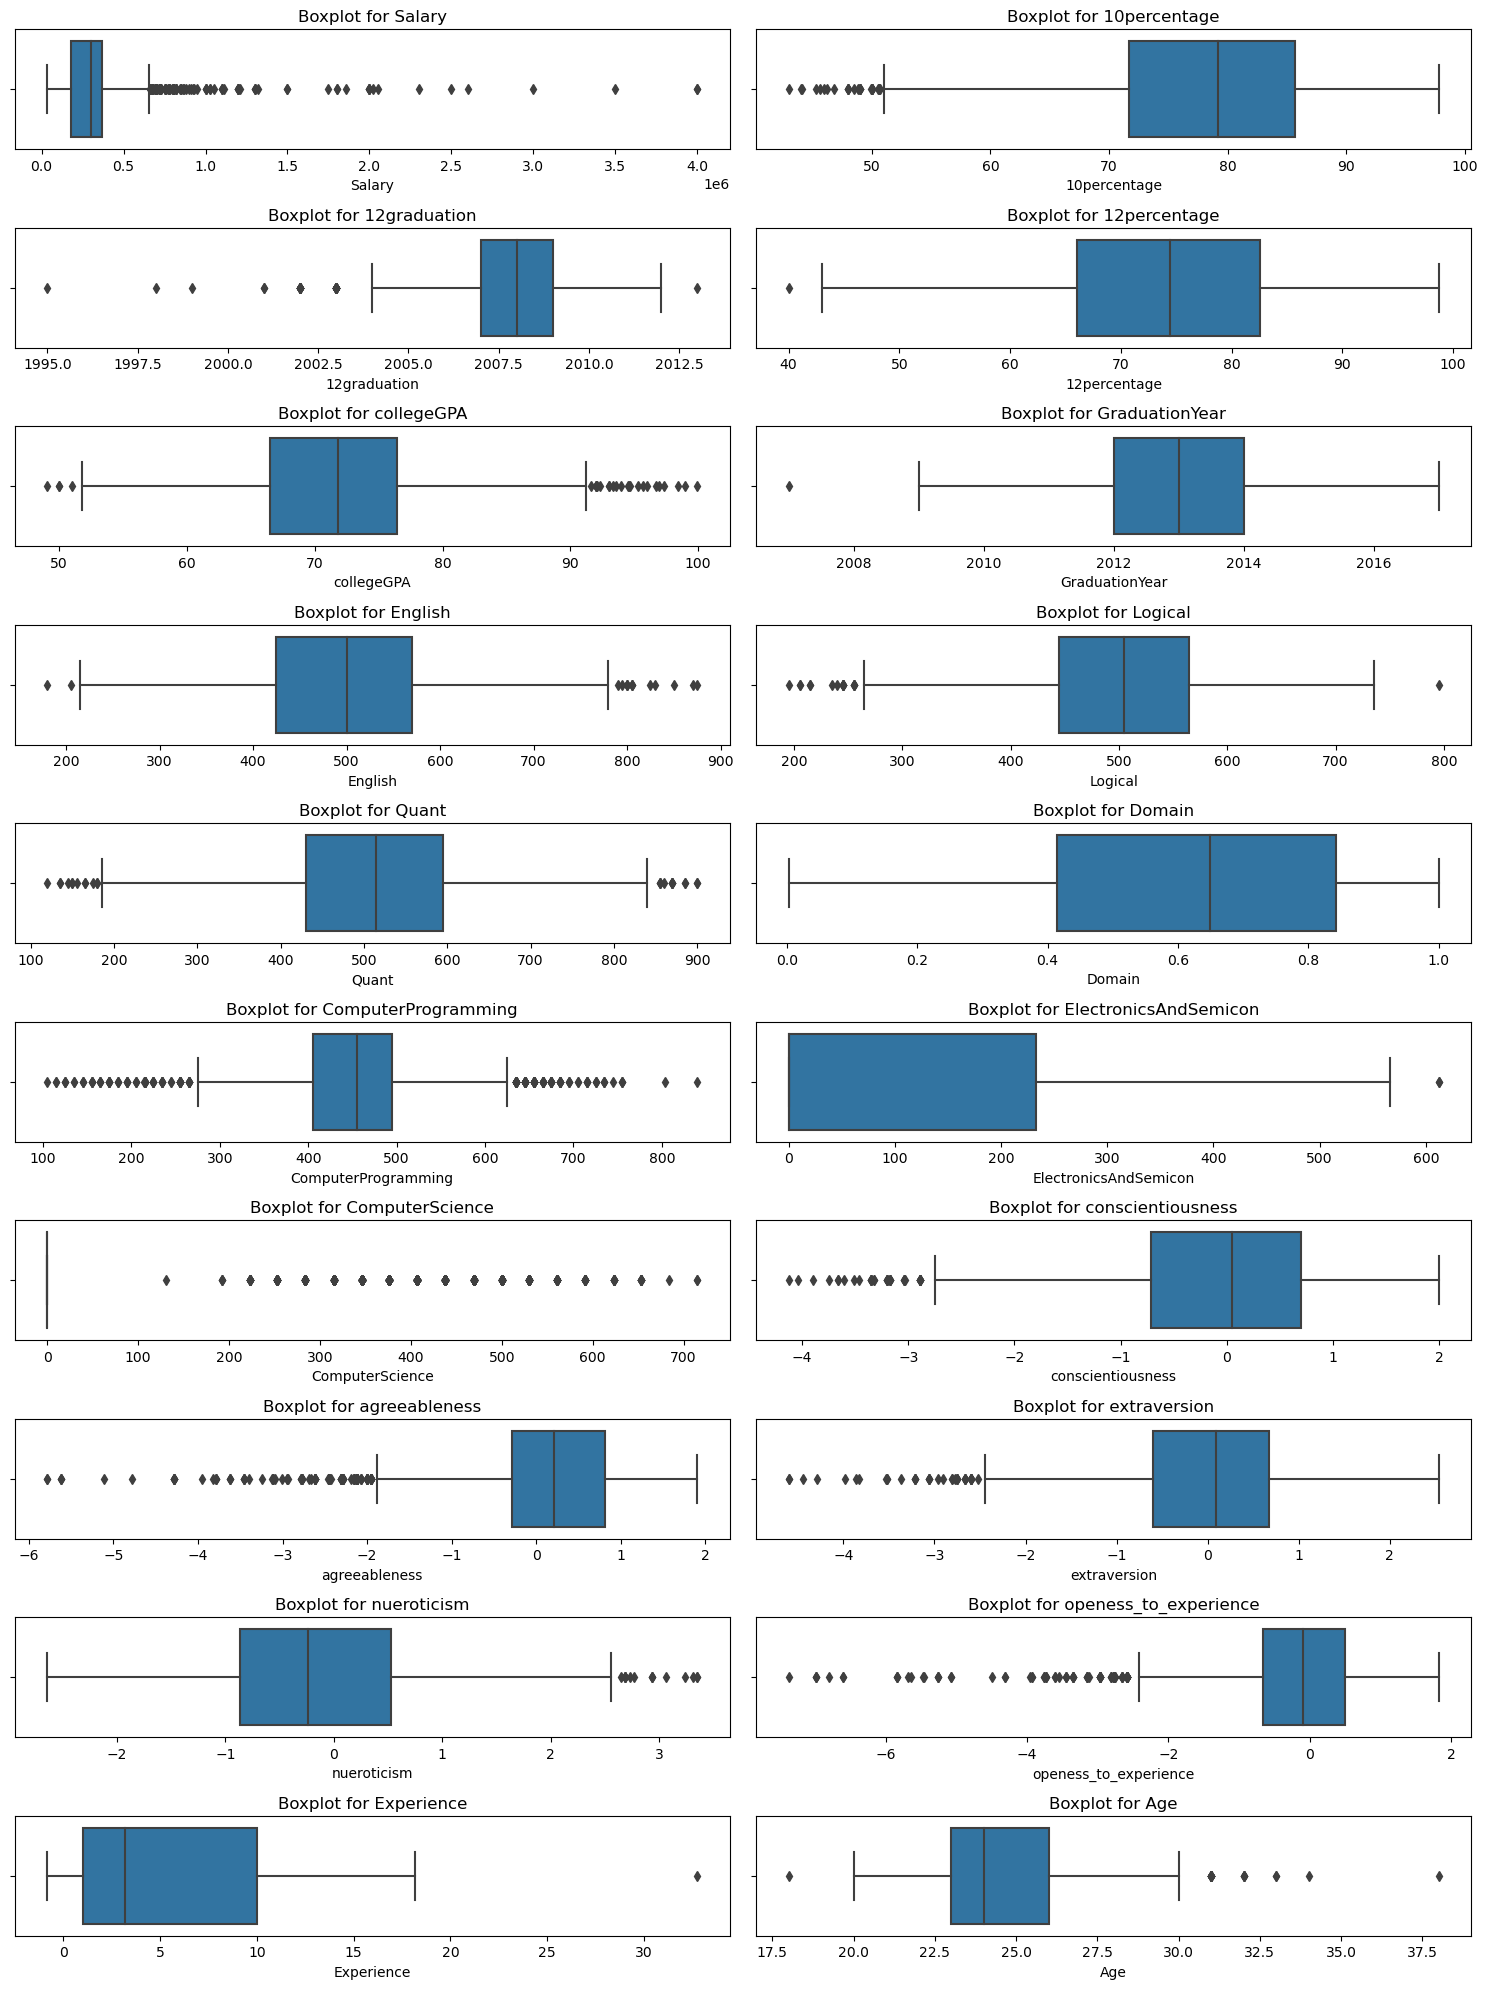

In [42]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_columns)
num_rows = (num_cols + 1) // 2  
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 2*num_rows))
for i, column in enumerate(numerical_columns):
    row = i // 2 
    col = i % 2  
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot for {column}')
    
plt.tight_layout()    
plt.show()


 boxplots provides a concise summary of the data distribution, showing the median and spread
(interquartile range) while also highlighting potential outliers beyond the whiskers


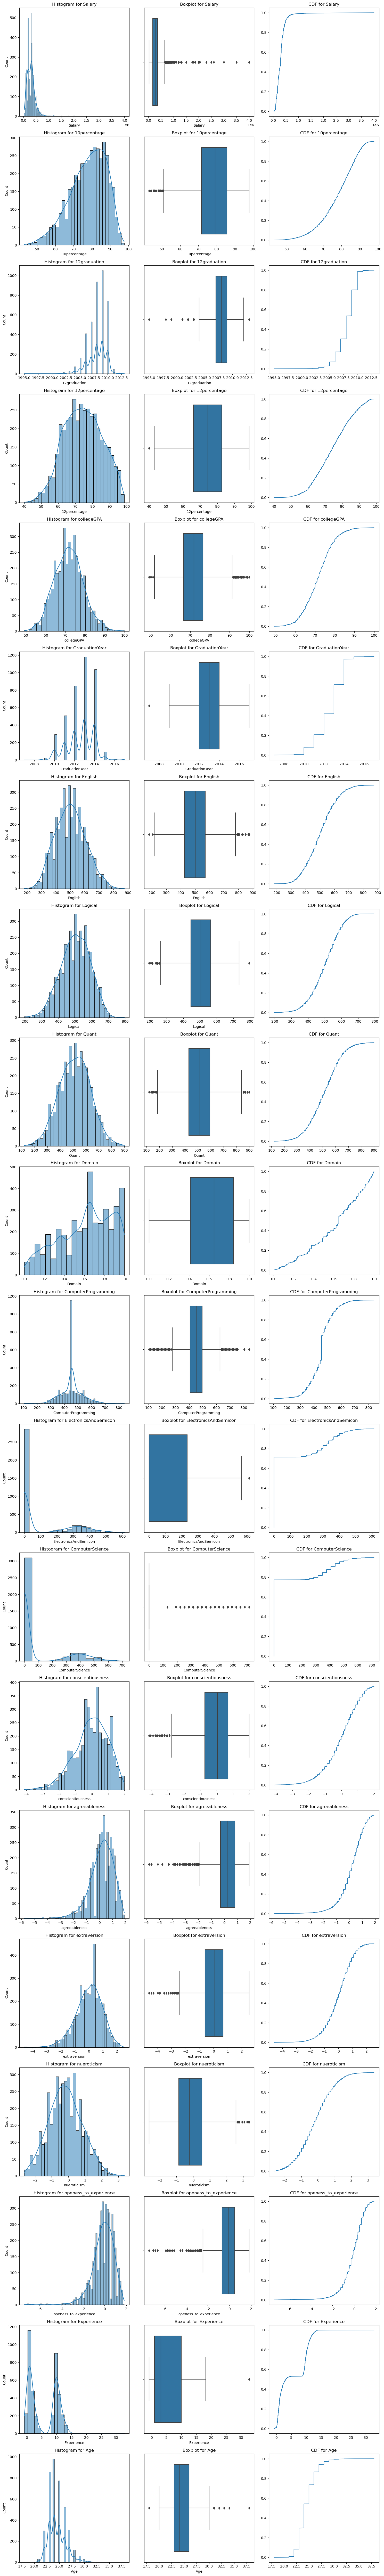

In [43]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
num_cols = len(numerical_columns)
fig, axes = plt.subplots(nrows=num_cols, ncols=3, figsize=(15, 5*num_cols))
for i, column in enumerate(numerical_columns):
    sns.histplot(data=df, x=column, ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram for {column}')

    sns.boxplot(data=df, x=column, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot for {column}')

    sorted_data = np.sort(df[column])
    y_vals = np.arange(len(sorted_data)) / float(len(sorted_data))
    axes[i, 2].plot(sorted_data, y_vals)
    axes[i, 2].set_title(f'CDF for {column}')

plt.tight_layout()
plt.show()


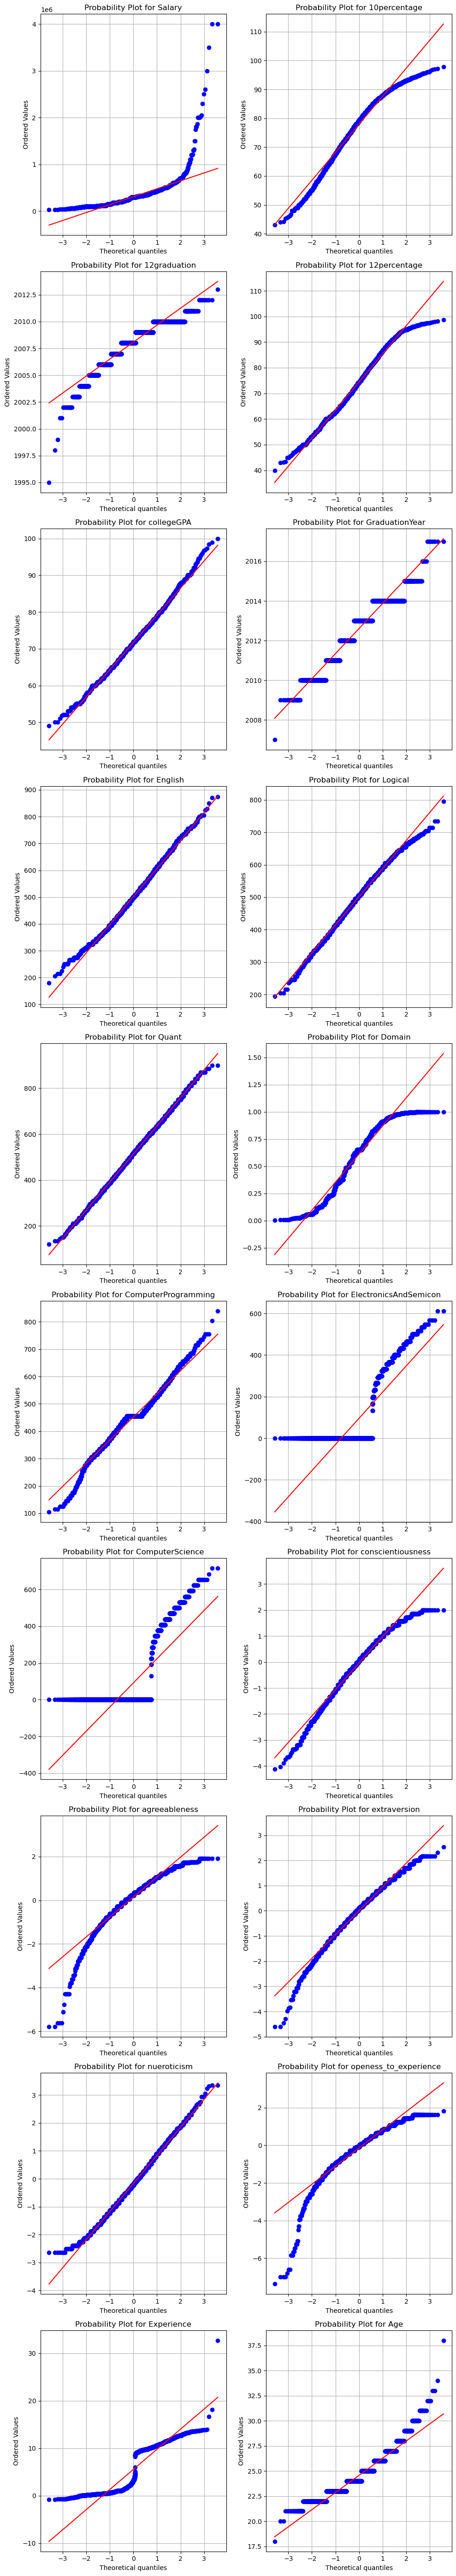

In [44]:
plt.figure(figsize=(10,56))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 1) // 2, 2, i)
    stats.probplot(df[column], dist='norm', plot=plt)
    plt.title(f'Probability Plot for {column}')
    plt.xlabel('Theoretical quantiles')
    plt.ylabel('Ordered Values')
    plt.grid(True)

plt.tight_layout()
plt.show()

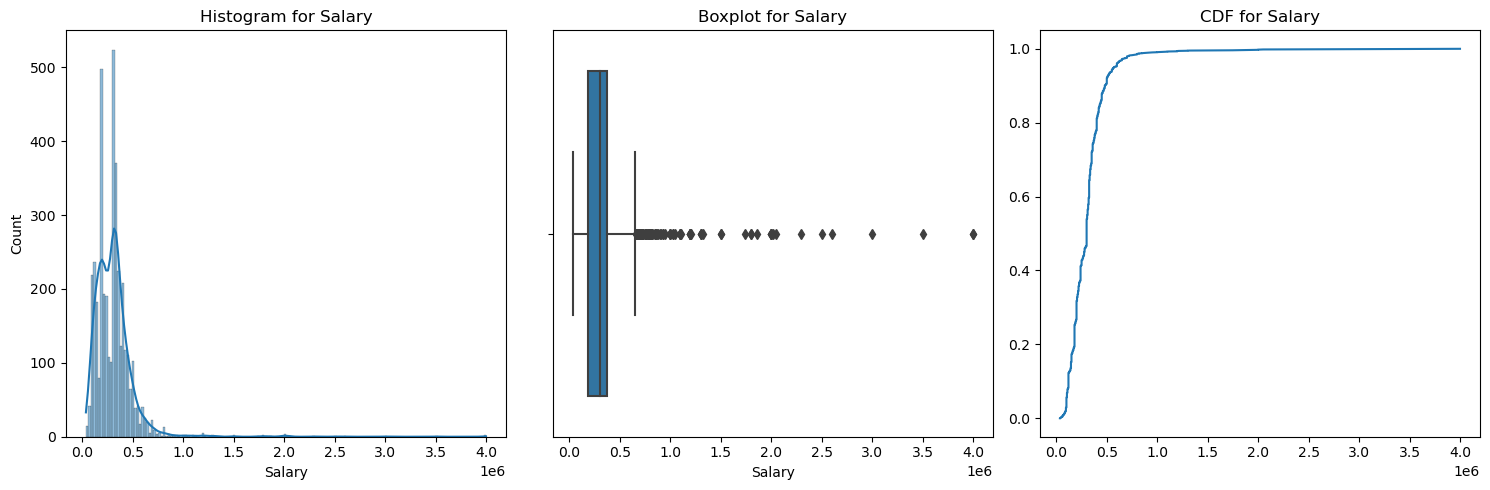

In [45]:
# Plot histogram
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Salary', kde=True)
plt.title('Histogram for Salary')

# Plot box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Salary')
plt.title('Boxplot for Salary')

# Plot CDF
plt.subplot(1, 3, 3)
sorted_data = np.sort(df['Salary'])
y_vals = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.plot(sorted_data, y_vals)
plt.title('CDF for Salary')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Observation

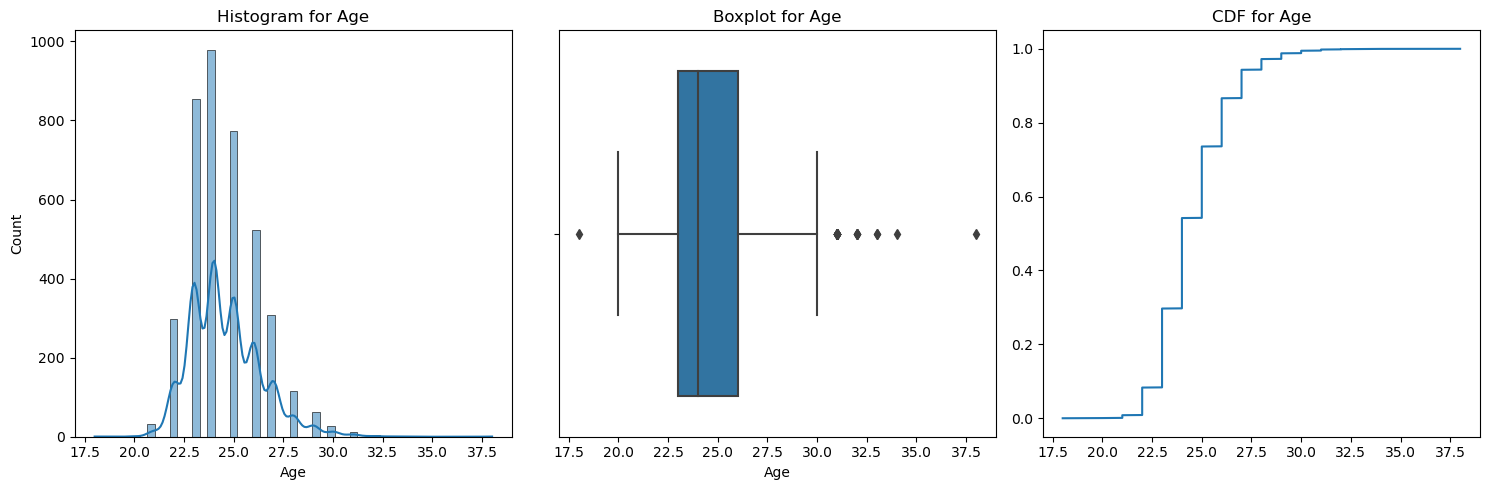

In [46]:
# Plot histogram
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Age', kde=True)
plt.title('Histogram for Age')

# Plot box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Age')
plt.title('Boxplot for Age')

# Plot CDF
plt.subplot(1, 3, 3)
sorted_data = np.sort(df['Age'])
y_vals = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.plot(sorted_data, y_vals)
plt.title('CDF for Age')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


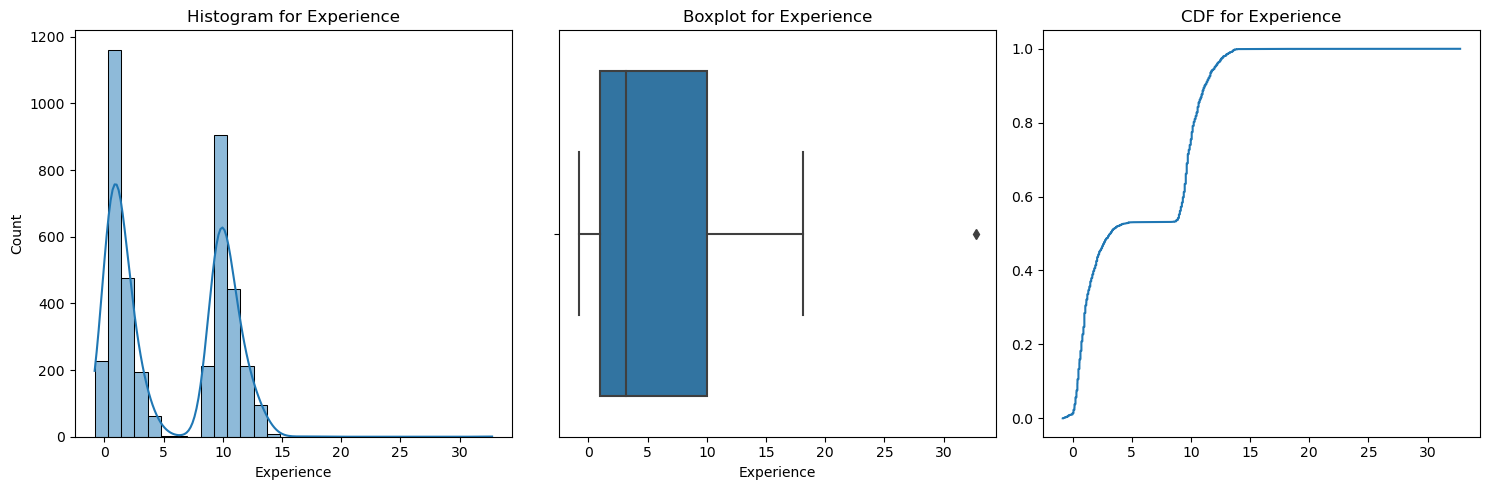

In [47]:
# Plot histogram
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Experience', kde=True)
plt.title('Histogram for Experience')

# Plot box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Experience')
plt.title('Boxplot for Experience')

# Plot CDF
plt.subplot(1, 3, 3)
sorted_data = np.sort(df['Experience'])
y_vals = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.plot(sorted_data, y_vals)
plt.title('CDF for Experience')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


Observation

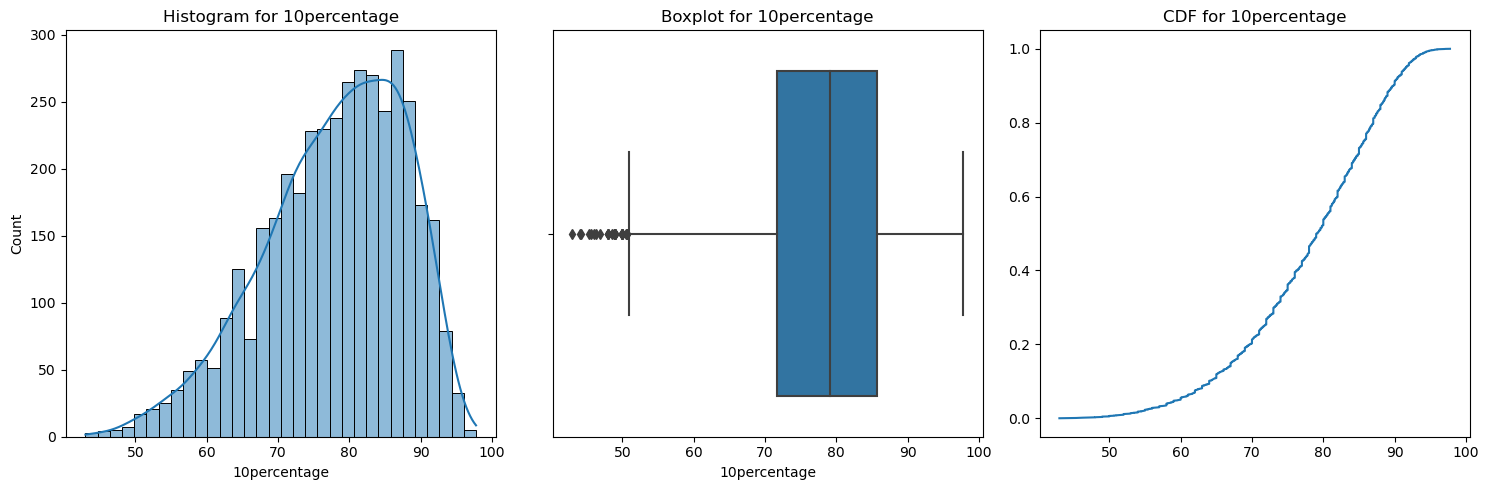

In [48]:
# Plot histogram
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='10percentage', kde=True)
plt.title('Histogram for 10percentage')

# Plot box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='10percentage')
plt.title('Boxplot for 10percentage')

# Plot CDF
plt.subplot(1, 3, 3)
sorted_data = np.sort(df['10percentage'])
y_vals = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.plot(sorted_data, y_vals)
plt.title('CDF for 10percentage')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


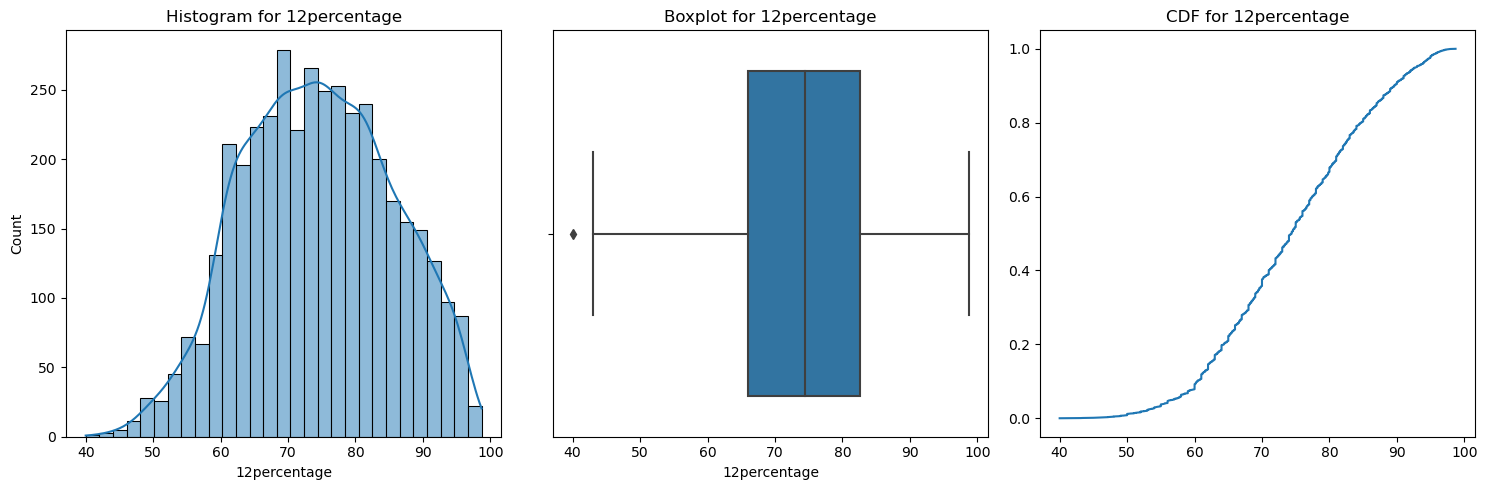

In [49]:
# Plot histogram
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='12percentage', kde=True)
plt.title('Histogram for 12percentage')

# Plot box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='12percentage')
plt.title('Boxplot for 12percentage')

# Plot CDF
plt.subplot(1, 3, 3)
sorted_data = np.sort(df['12percentage'])
y_vals = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.plot(sorted_data, y_vals)
plt.title('CDF for 12percentage')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


*Histogram	The histogram illustrates a scarcity of students with low percentages, with the majority 
scoring between 69% and 84%. The peak frequency occurs at 70%, and the average score is around 74%.
* Box Plot	The box plot indicates only one data point with an extremely low score.
* CDF	The data does not follow a normal distribution pattern.

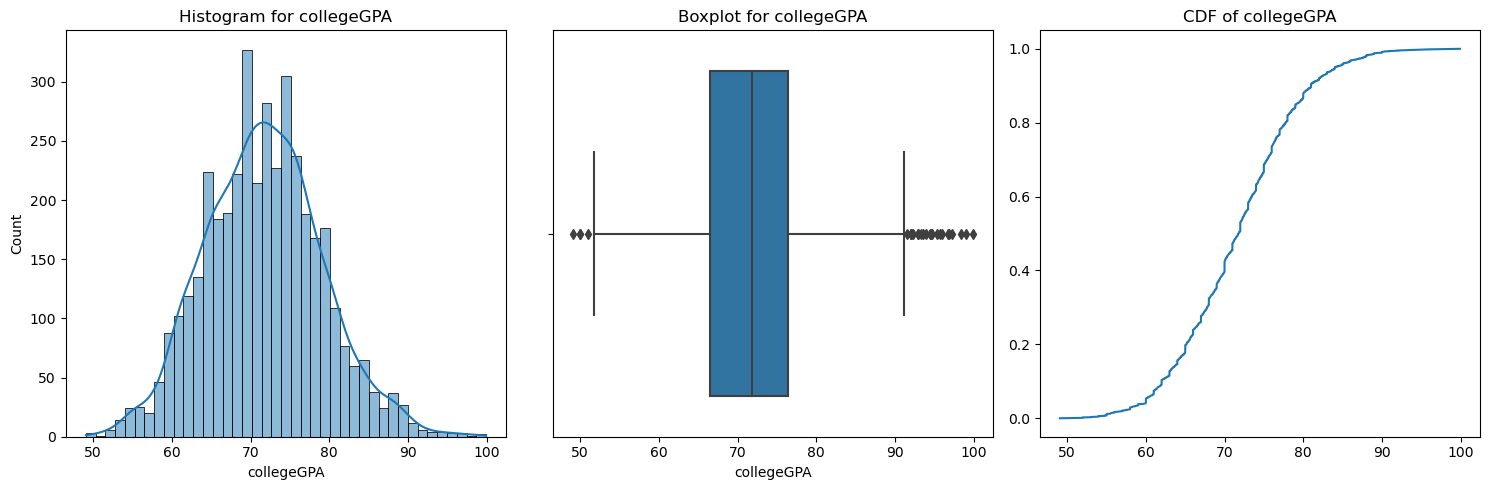

In [50]:
# Plot histogram
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='collegeGPA', kde=True)
plt.title('Histogram for collegeGPA')

# Plot box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='collegeGPA')
plt.title('Boxplot for collegeGPA')

# Plot CDF
plt.subplot(1, 3, 3)
sorted_data = np.sort(df['collegeGPA'])
y_vals = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.plot(sorted_data, y_vals)
plt.title('CDF of collegeGPA')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


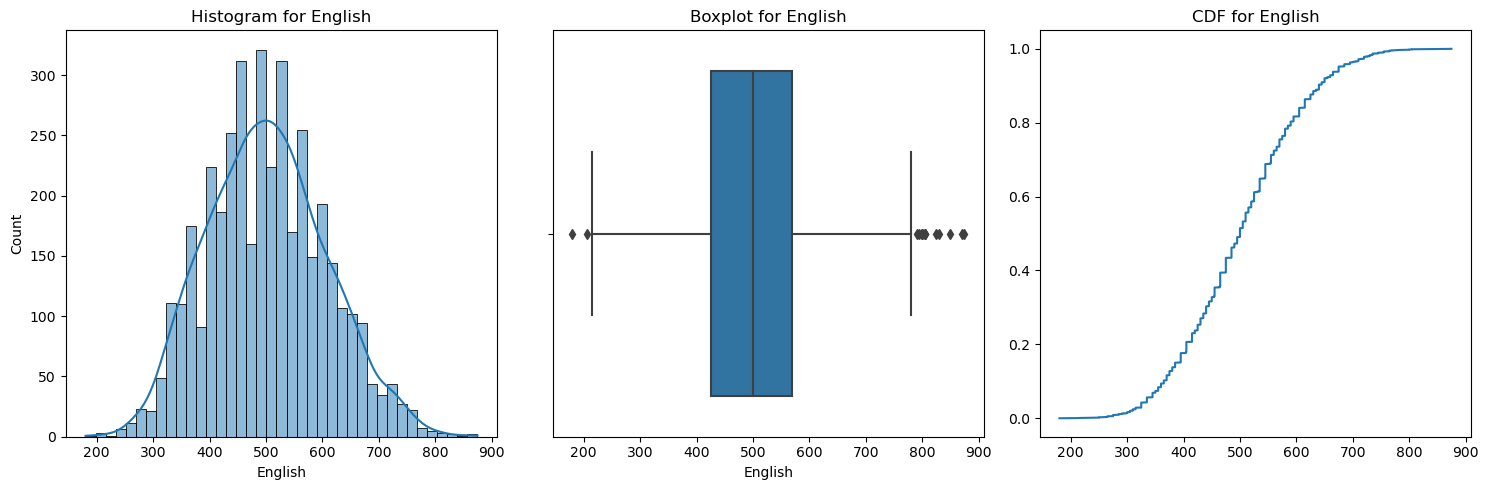

In [51]:
# Plot histogram
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='English', kde=True)
plt.title('Histogram for English')

# Plot box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='English')
plt.title('Boxplot for English')

# Plot CDF
plt.subplot(1, 3, 3)
sorted_data = np.sort(df['English'])
y_vals = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.plot(sorted_data, y_vals)
plt.title('CDF for English')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


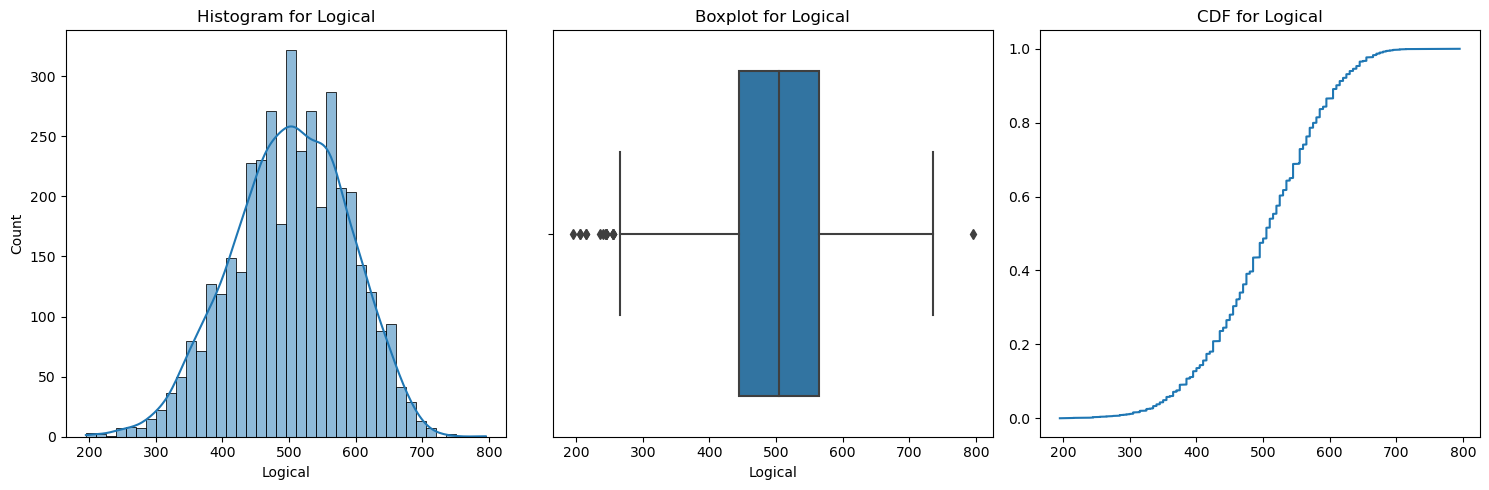

In [52]:
# Plot histogram
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Logical', kde=True)
plt.title('Histogram for Logical')

# Plot box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Logical')
plt.title('Boxplot for Logical')

# Plot CDF
plt.subplot(1, 3, 3)
sorted_data = np.sort(df['Logical'])
y_vals = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.plot(sorted_data, y_vals)
plt.title('CDF for Logical')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


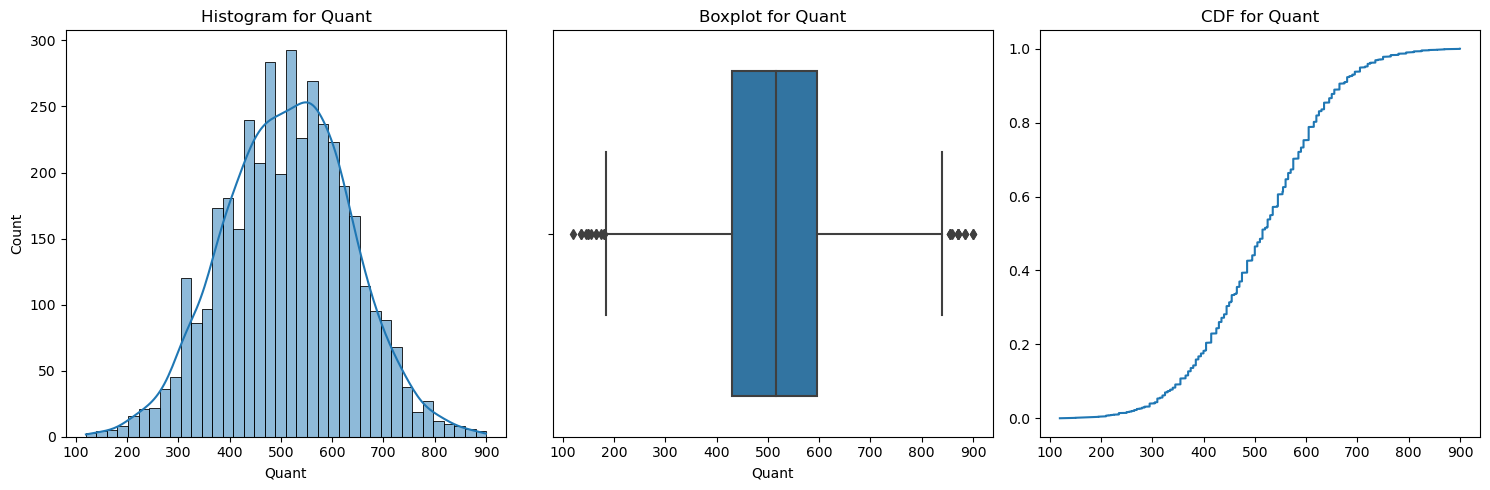

In [53]:
# Plot histogram
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='Quant', kde=True)
plt.title('Histogram for Quant')

# Plot box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='Quant')
plt.title('Boxplot for Quant')

# Plot CDF
plt.subplot(1, 3, 3)
sorted_data = np.sort(df['Quant'])
y_vals = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.plot(sorted_data, y_vals)
plt.title('CDF for Quant')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


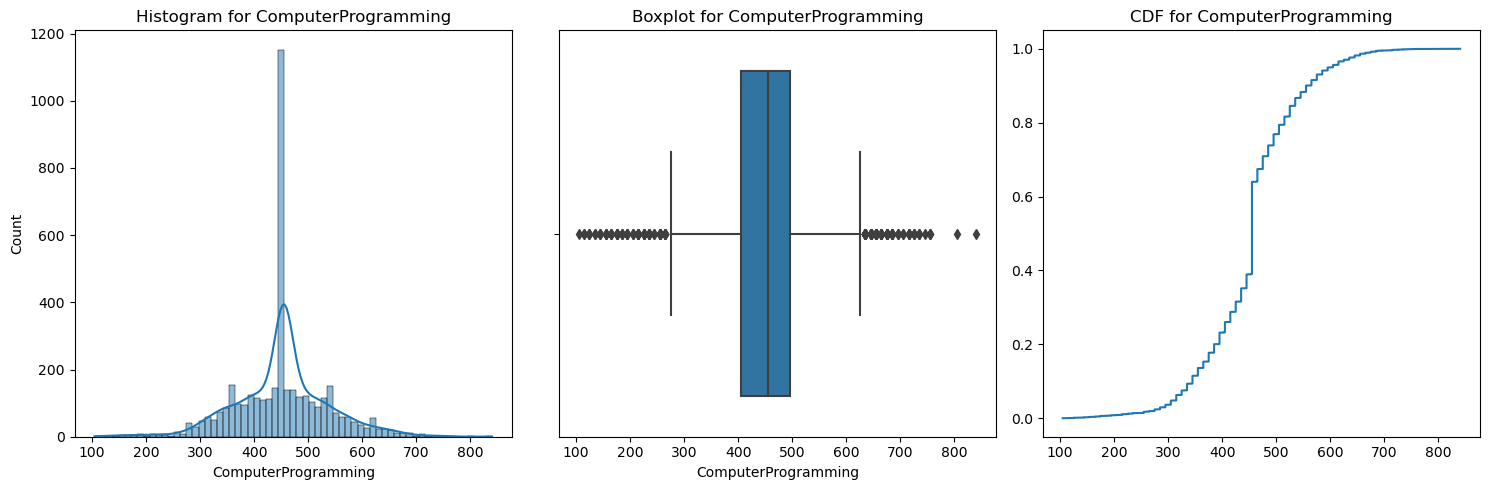

In [54]:
# Plot histogram
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='ComputerProgramming', kde=True)
plt.title('Histogram for ComputerProgramming')

# Plot box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='ComputerProgramming')
plt.title('Boxplot for ComputerProgramming')

# Plot CDF
plt.subplot(1, 3, 3)
sorted_data = np.sort(df['ComputerProgramming'])
y_vals = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.plot(sorted_data, y_vals)
plt.title('CDF for ComputerProgramming')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


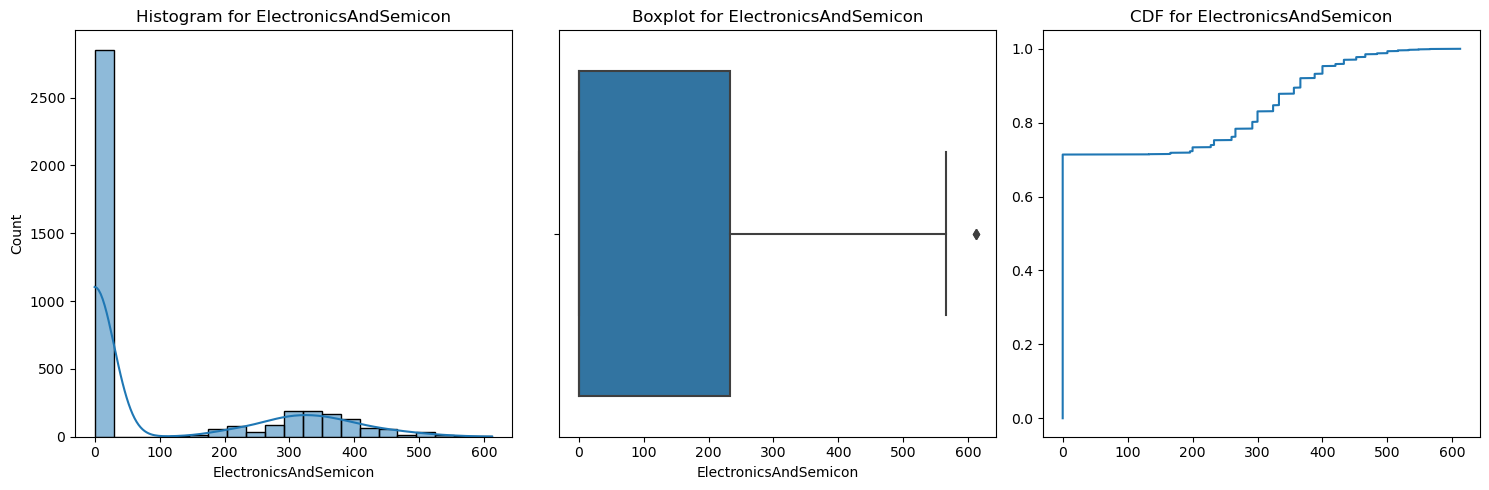

In [55]:
# Plot histogram
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='ElectronicsAndSemicon', kde=True)
plt.title('Histogram for ElectronicsAndSemicon')

# Plot box plot
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='ElectronicsAndSemicon')
plt.title('Boxplot for ElectronicsAndSemicon')

# Plot CDF
plt.subplot(1, 3, 3)
sorted_data = np.sort(df['ElectronicsAndSemicon'])
y_vals = np.arange(len(sorted_data)) / float(len(sorted_data))
plt.plot(sorted_data, y_vals)
plt.title('CDF for ElectronicsAndSemicon')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Categorical Columns

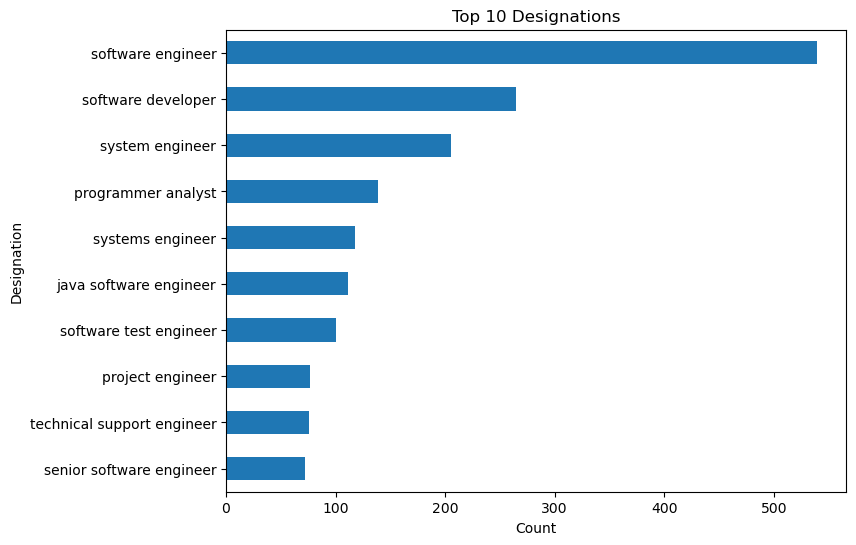

In [56]:
filtered_df = df[df['Designation'] != 'other']

top_10_designations = filtered_df['Designation'].value_counts().nlargest(10)
plt.figure(figsize=(8, 6))  
ax = top_10_designations.plot(kind='barh')

plt.title('Top 10 Designations')
plt.xlabel('Count')
plt.ylabel('Designation')

plt.gca().invert_yaxis()
plt.show()


Observation:
Software engineer is the most common desgination of all, followed by system engineer and software 
developer


In [57]:
df['Designation'].value_counts().head(40)

other                         2296
software engineer              539
software developer             265
system engineer                205
programmer analyst             139
systems engineer               118
java software engineer         111
software test engineer         100
project engineer                77
technical support engineer      76
senior software engineer        72
Name: Designation, dtype: int64

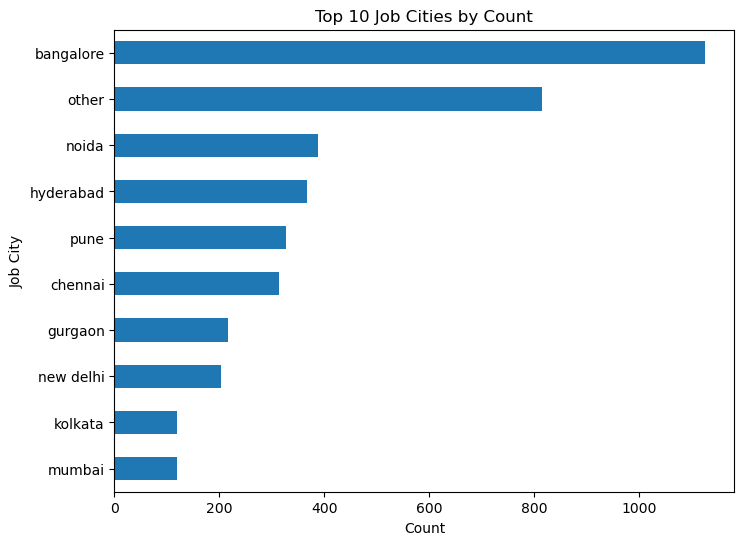

In [58]:
plt.figure(figsize=(8, 6))  
top_10_cities = df['JobCity'].value_counts().nlargest(10)  
ax = top_10_cities.plot(kind='barh')

plt.title('Top 10 Job Cities by Count')
plt.xlabel('Count')
plt.ylabel('Job City')

plt.gca().invert_yaxis()
plt.show()


Observation:
The most favourable city for job placements is bangalore, followed by Noid, Hyderabad and pune. Mumbai and kolkata being least 
favourable.

In [59]:
df['JobCity'].value_counts()

bangalore    1126
other         816
noida         389
hyderabad     368
pune          327
chennai       313
gurgaon       217
new delhi     204
kolkata       119
mumbai        119
Name: JobCity, dtype: int64

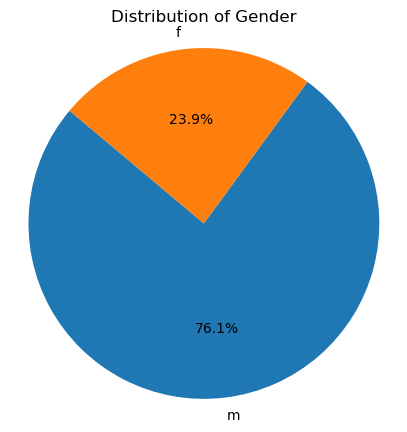

In [60]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.axis('equal')
plt.show()


Observation:
The dataset is not balanced in terms of gender as the population of Male is really larger as 
compared to the female one


In [61]:
df['Gender'].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

<AxesSubplot:>

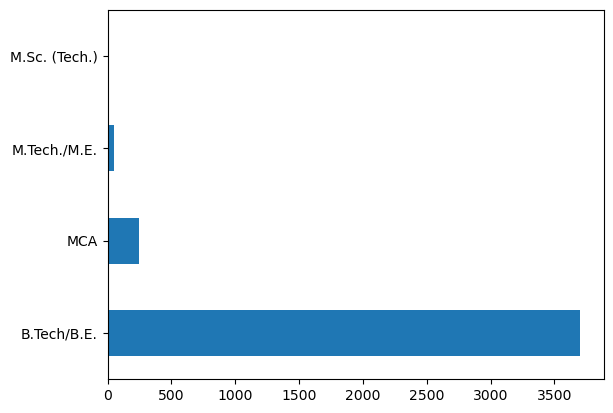

In [62]:
df['Degree'].value_counts().plot(kind='barh')

Observation:
Most of the students have done their graduation in B.Tech and there are very less students from
M.Sc(Tech)

In [63]:
df['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

<AxesSubplot:>

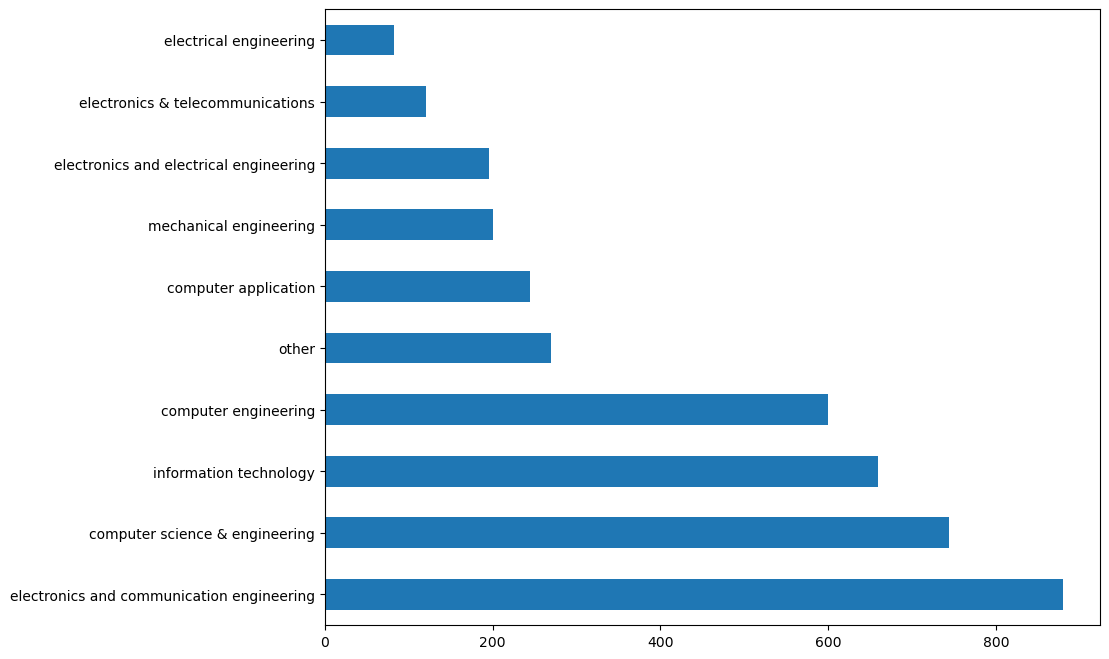

In [64]:
plt.figure(figsize=(10,8))
df['Specialization'].value_counts().plot(kind='barh')

Observation:
Most of the students have done their Specialisation in electronics and communication engineering,
computer science & engineering  

In [65]:
df['Specialization'].value_counts()

electronics and communication engineering    880
computer science & engineering               744
information technology                       660
computer engineering                         600
other                                        270
computer application                         244
mechanical engineering                       201
electronics and electrical engineering       196
electronics & telecommunications             121
electrical engineering                        82
Name: Specialization, dtype: int64

<AxesSubplot:>

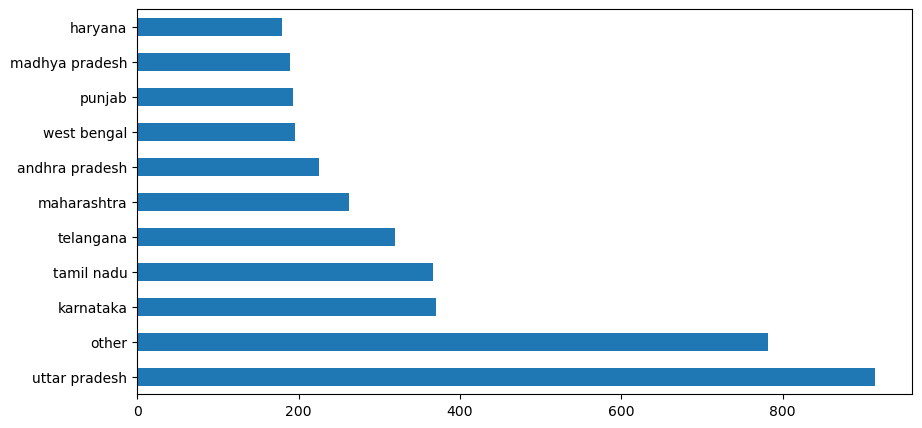

In [66]:
plt.figure(figsize=(10, 5))
df['CollegeState'].value_counts().plot(kind='barh')

Observation:
Most of the college are in Uttar pradesh 

In [67]:
df['CollegeState'].value_counts()

uttar pradesh     915
other             782
karnataka         370
tamil nadu        367
telangana         319
maharashtra       262
andhra pradesh    225
west bengal       196
punjab            193
madhya pradesh    189
haryana           180
Name: CollegeState, dtype: int64

<AxesSubplot:>

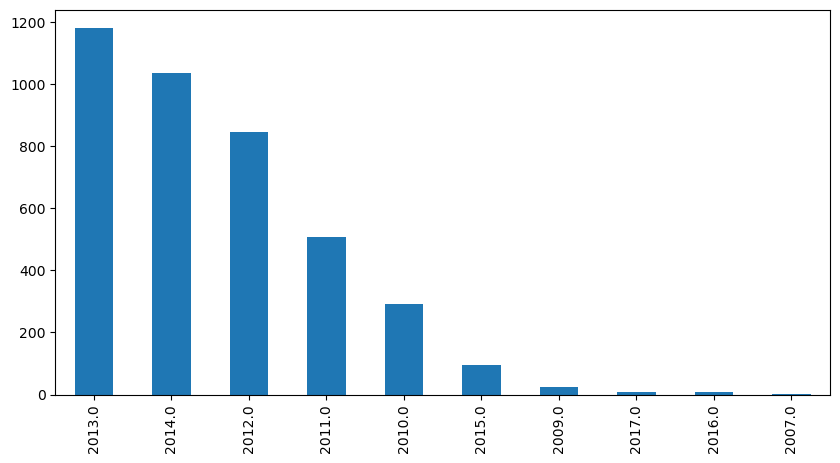

In [68]:
plt.figure(figsize=(10, 5))
df['GraduationYear'].value_counts().plot(kind='bar')

Observation:
Maximum number of students were graduated in 2013, followed by the year 2014 and 2012

In [69]:
df['GraduationYear'].value_counts()

2013.0    1182
2014.0    1036
2012.0     847
2011.0     507
2010.0     292
2015.0      94
2009.0      24
2017.0       8
2016.0       7
2007.0       1
Name: GraduationYear, dtype: int64

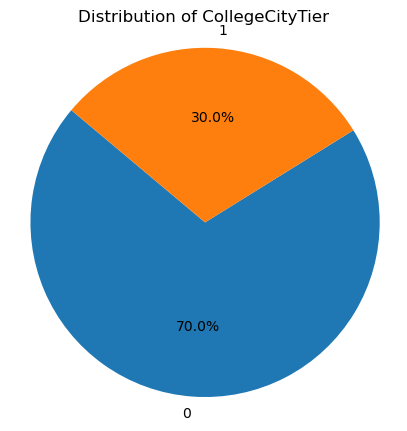

In [70]:
gender_counts = df['CollegeCityTier'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of CollegeCityTier')
plt.axis('equal')
plt.show()


Observation:
Majority of the colleges are form Tier 0 city.

In [71]:
df['CollegeCityTier'].value_counts()

0    2797
1    1201
Name: CollegeCityTier, dtype: int64

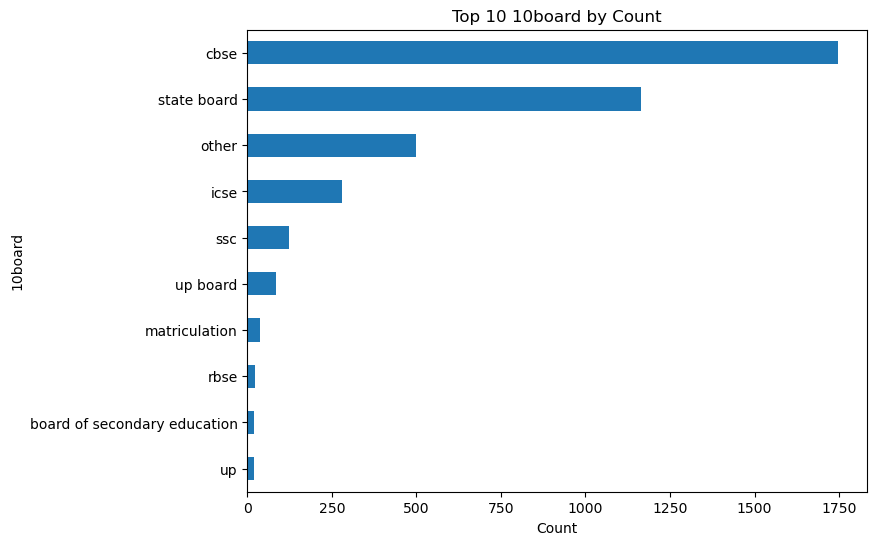

In [72]:
plt.figure(figsize=(8, 6))  
top_10_cities = df['10board'].value_counts().nlargest(10)  
ax = top_10_cities.plot(kind='barh')

plt.title('Top 10 10board by Count')
plt.xlabel('Count')
plt.ylabel('10board')

plt.gca().invert_yaxis()
plt.show()


In [73]:
df['10board'].value_counts().head(10)

cbse                            1746
state board                     1165
other                            499
icse                             281
ssc                              122
up board                          85
matriculation                     38
rbse                              23
board of secondary education      20
up                                19
Name: 10board, dtype: int64

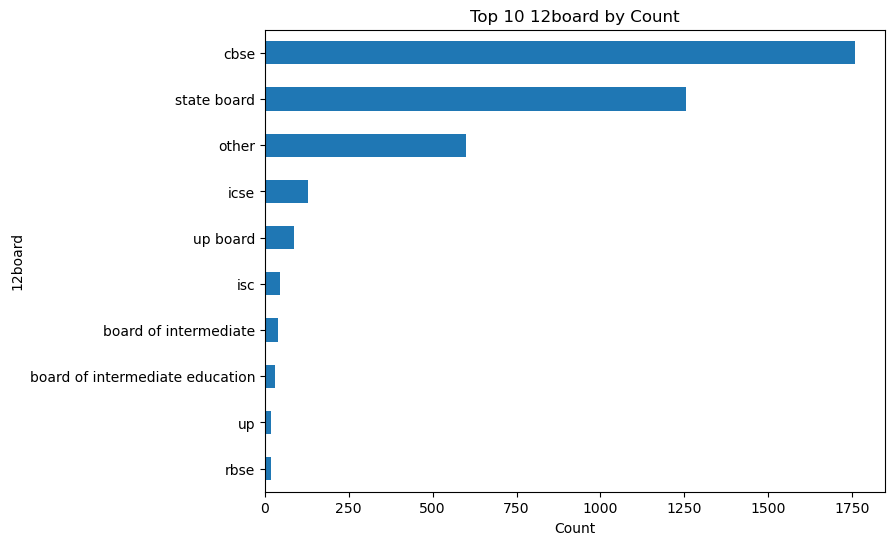

In [74]:
plt.figure(figsize=(8, 6))  
top_10_cities = df['12board'].value_counts().nlargest(10)  
ax = top_10_cities.plot(kind='barh')

plt.title('Top 10 12board by Count')
plt.xlabel('Count')
plt.ylabel('12board')

plt.gca().invert_yaxis()
plt.show()


In [75]:
df['12board'].value_counts()

cbse                               1759
state board                        1255
other                               598
icse                                129
up board                             87
isc                                  45
board of intermediate                38
board of intermediate education      31
up                                   20
rbse                                 19
mp board                             17
Name: 12board, dtype: int64

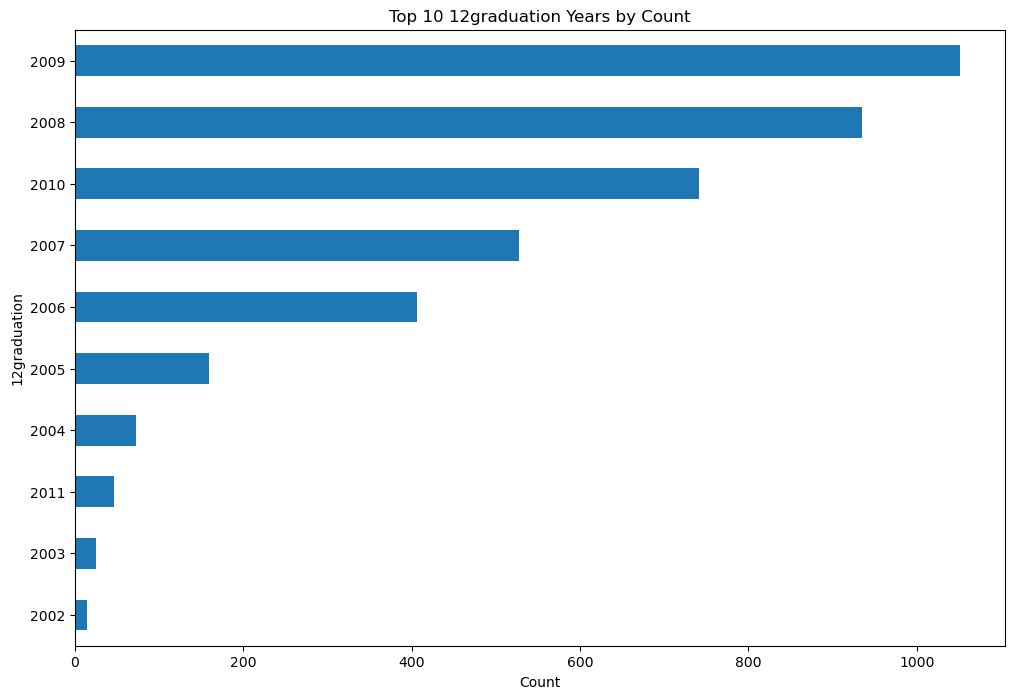

In [76]:
top_10_12graduation = df['12graduation'].value_counts().nlargest(10)
plt.figure(figsize=(12, 8))
ax = top_10_12graduation.plot(kind='barh')
plt.title('Top 10 12graduation Years by Count')
plt.xlabel('Count')
plt.ylabel('12graduation')


plt.gca().invert_yaxis()
plt.show()


Observations:
CBSE is the most common school board for both 12th and 10th.

In [77]:
df['12graduation'].value_counts()

2009    1052
2008     935
2010     742
2007     528
2006     407
2005     160
2004      73
2011      46
2003      25
2002      14
2012      10
2001       2
1995       1
1998       1
2013       1
1999       1
Name: 12graduation, dtype: int64

In [78]:
# Get numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Function to detect outliers using IQR
def detect_outliers_iqr(column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers



Percentage of outliers in each column

In [79]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
percentage_outliers = {}

# Function to calculate percentage of outliers
def calculate_percentage_outliers(column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
    percentage = (outliers_count / len(df)) * 100
    return percentage

# Calculate percentage of outliers for each numerical column
for column in numerical_columns:
    percentage_outliers[column] = calculate_percentage_outliers(column)

# Print percentage of outliers for each numerical column
for column, percentage in percentage_outliers.items():
    print(f'outliers in column "{column}":   {percentage:.2f} %')


outliers in column "Salary":   2.73 %
outliers in column "10percentage":   0.75 %
outliers in column "12graduation":   1.13 %
outliers in column "12percentage":   0.03 %
outliers in column "collegeGPA":   0.68 %
outliers in column "GraduationYear":   0.03 %
outliers in column "English":   0.38 %
outliers in column "Logical":   0.45 %
outliers in column "Quant":   0.63 %
outliers in column "Domain":   0.00 %
outliers in column "ComputerProgramming":   4.93 %
outliers in column "ElectronicsAndSemicon":   0.05 %
outliers in column "ComputerScience":   22.56 %
outliers in column "conscientiousness":   0.98 %
outliers in column "agreeableness":   3.08 %
outliers in column "extraversion":   1.00 %
outliers in column "nueroticism":   0.38 %
outliers in column "openess_to_experience":   2.38 %
outliers in column "Experience":   0.03 %
outliers in column "Age":   0.55 %


In [81]:
# Calculate the correlation matrix
'''correlation_matrix = df.select_dtypes(include=['int', 'float']).corr()

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()'''


'correlation_matrix = df.select_dtypes(include=[\'int\', \'float\']).corr()\n\n# Create a heatmap\nplt.figure(figsize=(15, 8))\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f", linewidths=.5)\nplt.title(\'Correlation Heatmap of Numerical Columns\')\nplt.show()'

In [82]:
''''
# Get numerical columns (excluding 'ID' column)
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.drop('ID')
sns.pairplot(df[numerical_columns], height=3)
plt.show()''''


SyntaxError: EOL while scanning string literal (1073283342.py, line 5)

# Bivariate Analysis

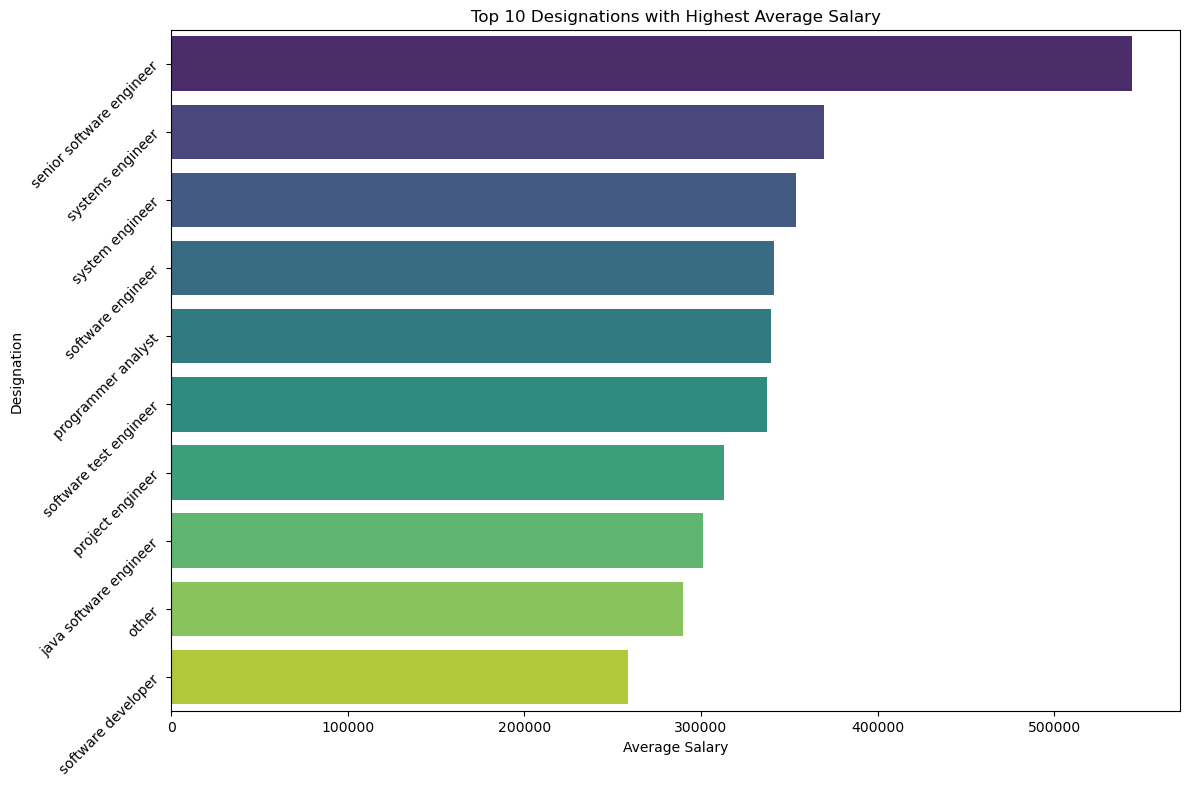

In [84]:
average_salary_by_designation = df.groupby('Designation')['Salary'].mean().sort_values(ascending=False)
top_10_designations = average_salary_by_designation.head(10)
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=top_10_designations.values, y=top_10_designations.index, palette='viridis')
barplot.set_yticklabels(barplot.get_yticklabels(), rotation=45)
plt.xlabel('Average Salary')
plt.ylabel('Designation')
plt.title('Top 10 Designations with Highest Average Salary')
plt.tight_layout()  
plt.show()


Observation:
Bar plot shows the maximum salary for each Designation. Senior Software Engineer has the highest 
salary but they also has the maximum standard deviation in their salary. software developer has salary lower than average salary.


In [85]:
top_10_designations

Designation
senior software engineer    544027.777778
systems engineer            369364.406780
system engineer             354048.780488
software engineer           341215.213358
programmer analyst          339784.172662
software test engineer      337450.000000
project engineer            312922.077922
java software engineer      301306.306306
other                       289973.432056
software developer          258377.358491
Name: Salary, dtype: float64

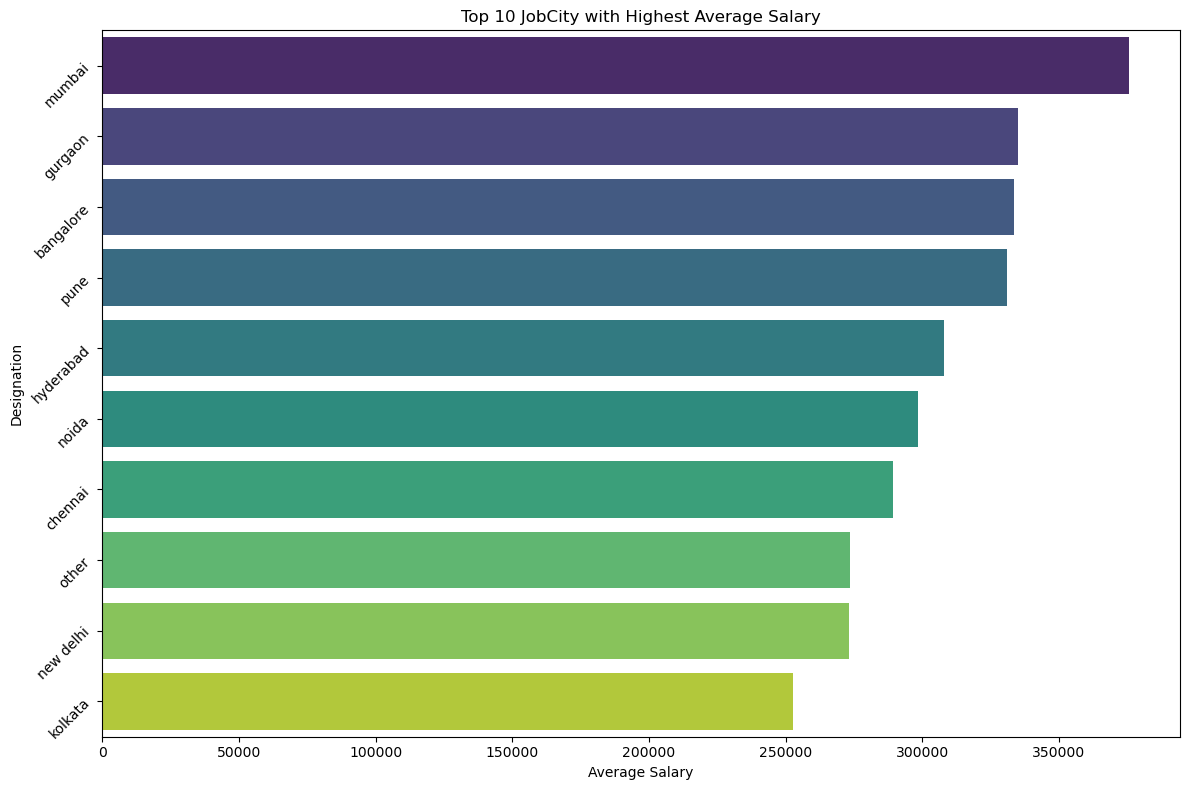

In [86]:
average_salary_by_designation = df.groupby('JobCity')['Salary'].mean().sort_values(ascending=False)
top_10_designations = average_salary_by_designation.head(10)
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=top_10_designations.values, y=top_10_designations.index, palette='viridis')
barplot.set_yticklabels(barplot.get_yticklabels(), rotation=45)
plt.xlabel('Average Salary')
plt.ylabel('Designation')
plt.title('Top 10 JobCity with Highest Average Salary')
plt.tight_layout()  
plt.show()


Observation:
Bar plot shows salary for each JobCity mumbai has highest salary and followed by gurgaon,banglore

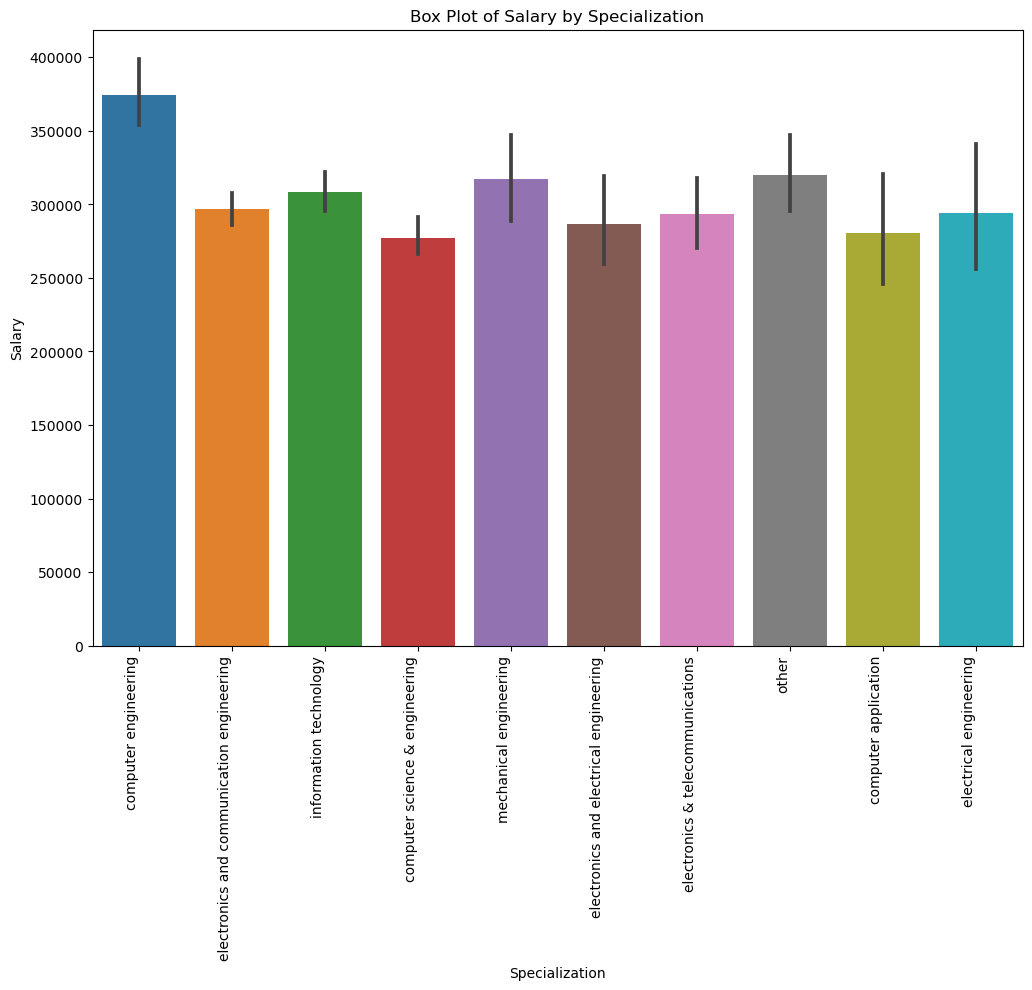

In [87]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Specialization', y='Salary', data=df)
plt.xlabel('Specialization')
plt.ylabel('Salary')
plt.title('Box Plot of Salary by Specialization')
plt.xticks(rotation=90, ha='right')
plt.show()


Observation:
Boxplot shows salary for specilization who done their specilization in computer engineering has 
higher salary and followed by mechanical engineering

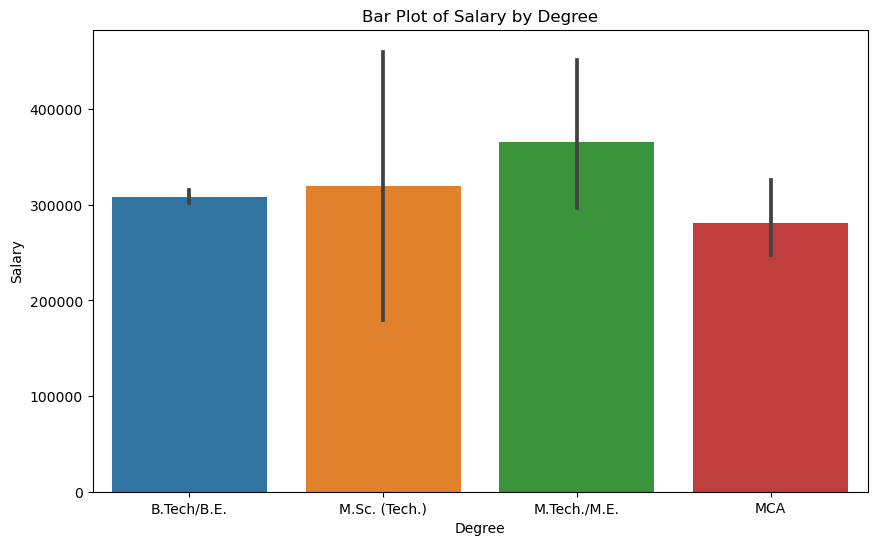

In [88]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Degree', y='Salary', data=df)
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.title('Bar Plot of Salary by Degree')
plt.show()


Observation:
Box plot shows salary for Degree M.Tech/M.E graduates earning high salary than other graduates

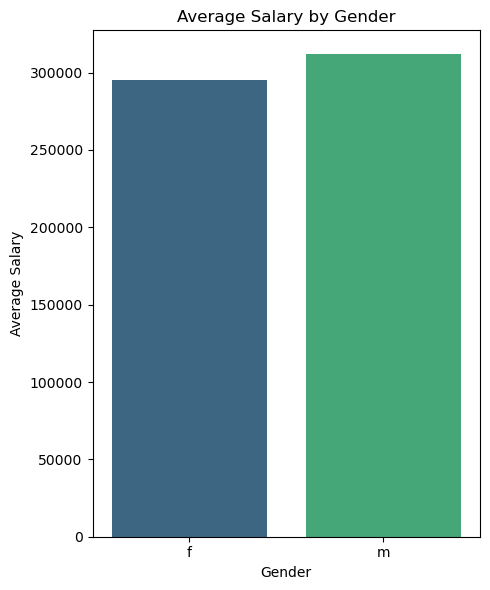

In [89]:
average_salary_by_gender = df.groupby('Gender')['Salary'].mean()
plt.figure(figsize=(5, 6))
sns.barplot(x=average_salary_by_gender.index, y=average_salary_by_gender.values, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.title('Average Salary by Gender')
plt.tight_layout() 
plt.show()


Observation:
The average salary for both male and female is approximately equal and it implies that there was no
gender bias in terms of salary. It is also plausible to say that Female's get salary below the overall
average salary


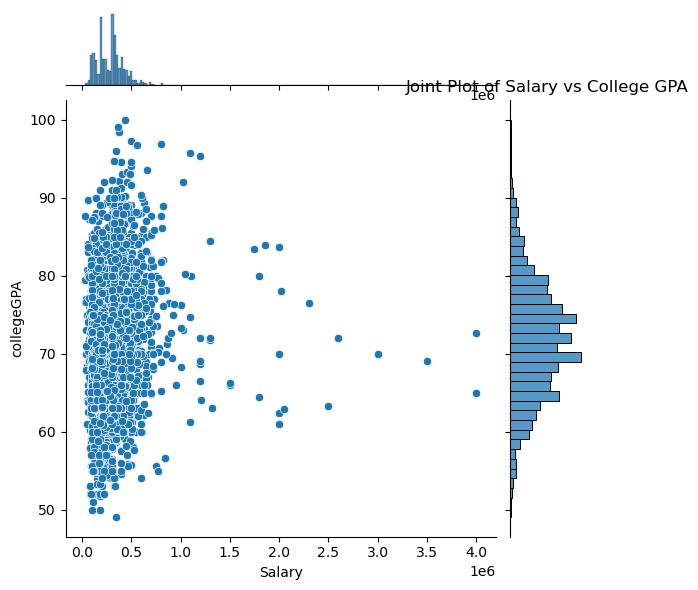

In [90]:
sns.jointplot(x='Salary', y='collegeGPA', data=df, kind='scatter')
plt.xlabel('Salary')
plt.ylabel('College GPA')
plt.title('Joint Plot of Salary vs College GPA')
plt.show()


Observation:
There does not exist any correlation between Salary and collegeGPA 

<AxesSubplot:ylabel='Specialization'>

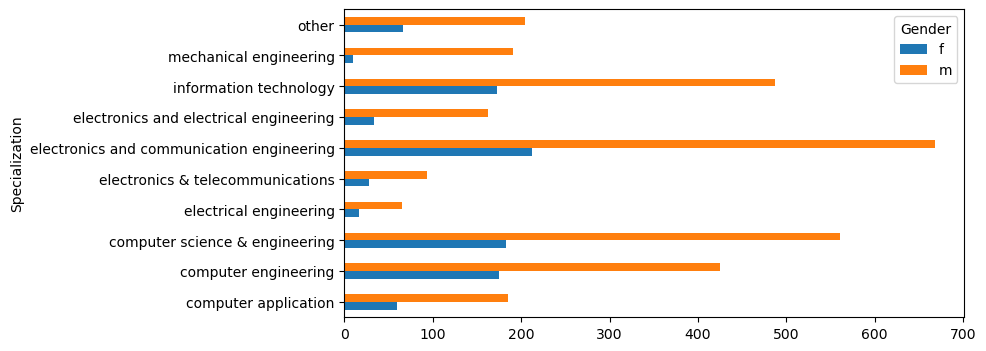

In [91]:
pd.crosstab(df['Gender'],df['Specialization']).T.plot(kind = 'barh',figsize = (8,4))

Observation:
There are almost males 2 times as of females in every specialization. Also, there are very less number
of females who opted for mechanical and electronics


<AxesSubplot:ylabel='Designation'>

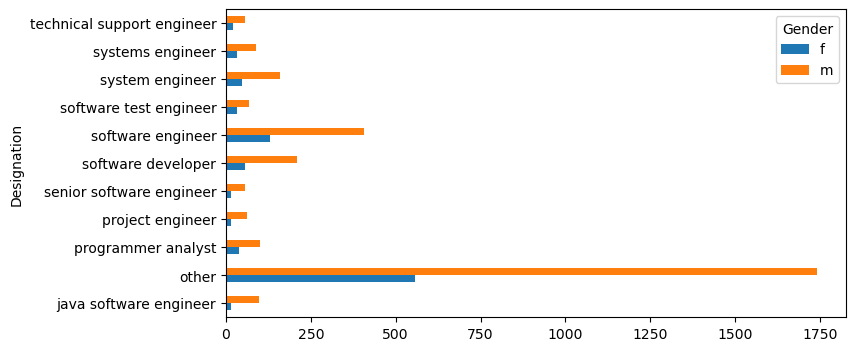

In [92]:
pd.crosstab(df['Gender'],df['Designation']).T.plot(kind = 'barh',figsize = (8,4))

There are almost males 2 times as of females in every Designation. 


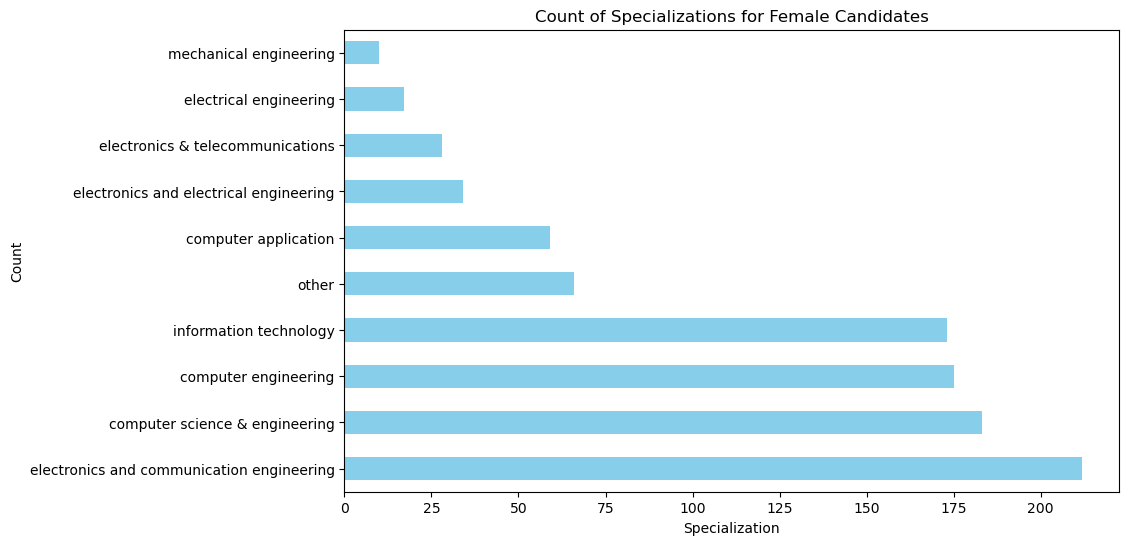

In [93]:
female_specializations = df[df['Gender'] == 'f']['Specialization']
specialization_counts = female_specializations.value_counts()
plt.figure(figsize=(10, 6))
specialization_counts.plot(kind='barh', color='skyblue')
plt.title('Count of Specializations for Female Candidates')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.xticks()
plt.show()


Observation:
Most of the females choosen specialization in Degree is electronics and communication engineering followed by 
computerscience & engineering 

<AxesSubplot:xlabel='Degree'>

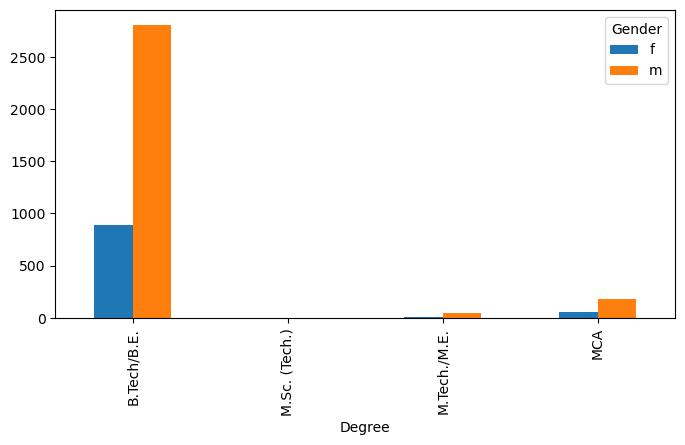

In [94]:
pd.crosstab(df['Gender'],df['Degree']).T.plot(kind = 'bar',figsize = (8,4))

Observation:
Most of choosed Degree was B.Tech/B.E and there is only one male and one female are choosed M.SC.(Tech) Degree

In [95]:
cross_tab = pd.crosstab(df['Degree'], df['Gender'])
cross_tab


Gender           f     m
Degree                  
B.Tech/B.E.    889  2811
M.Sc. (Tech.)    1     1
M.Tech./M.E.     9    44
MCA             58   185

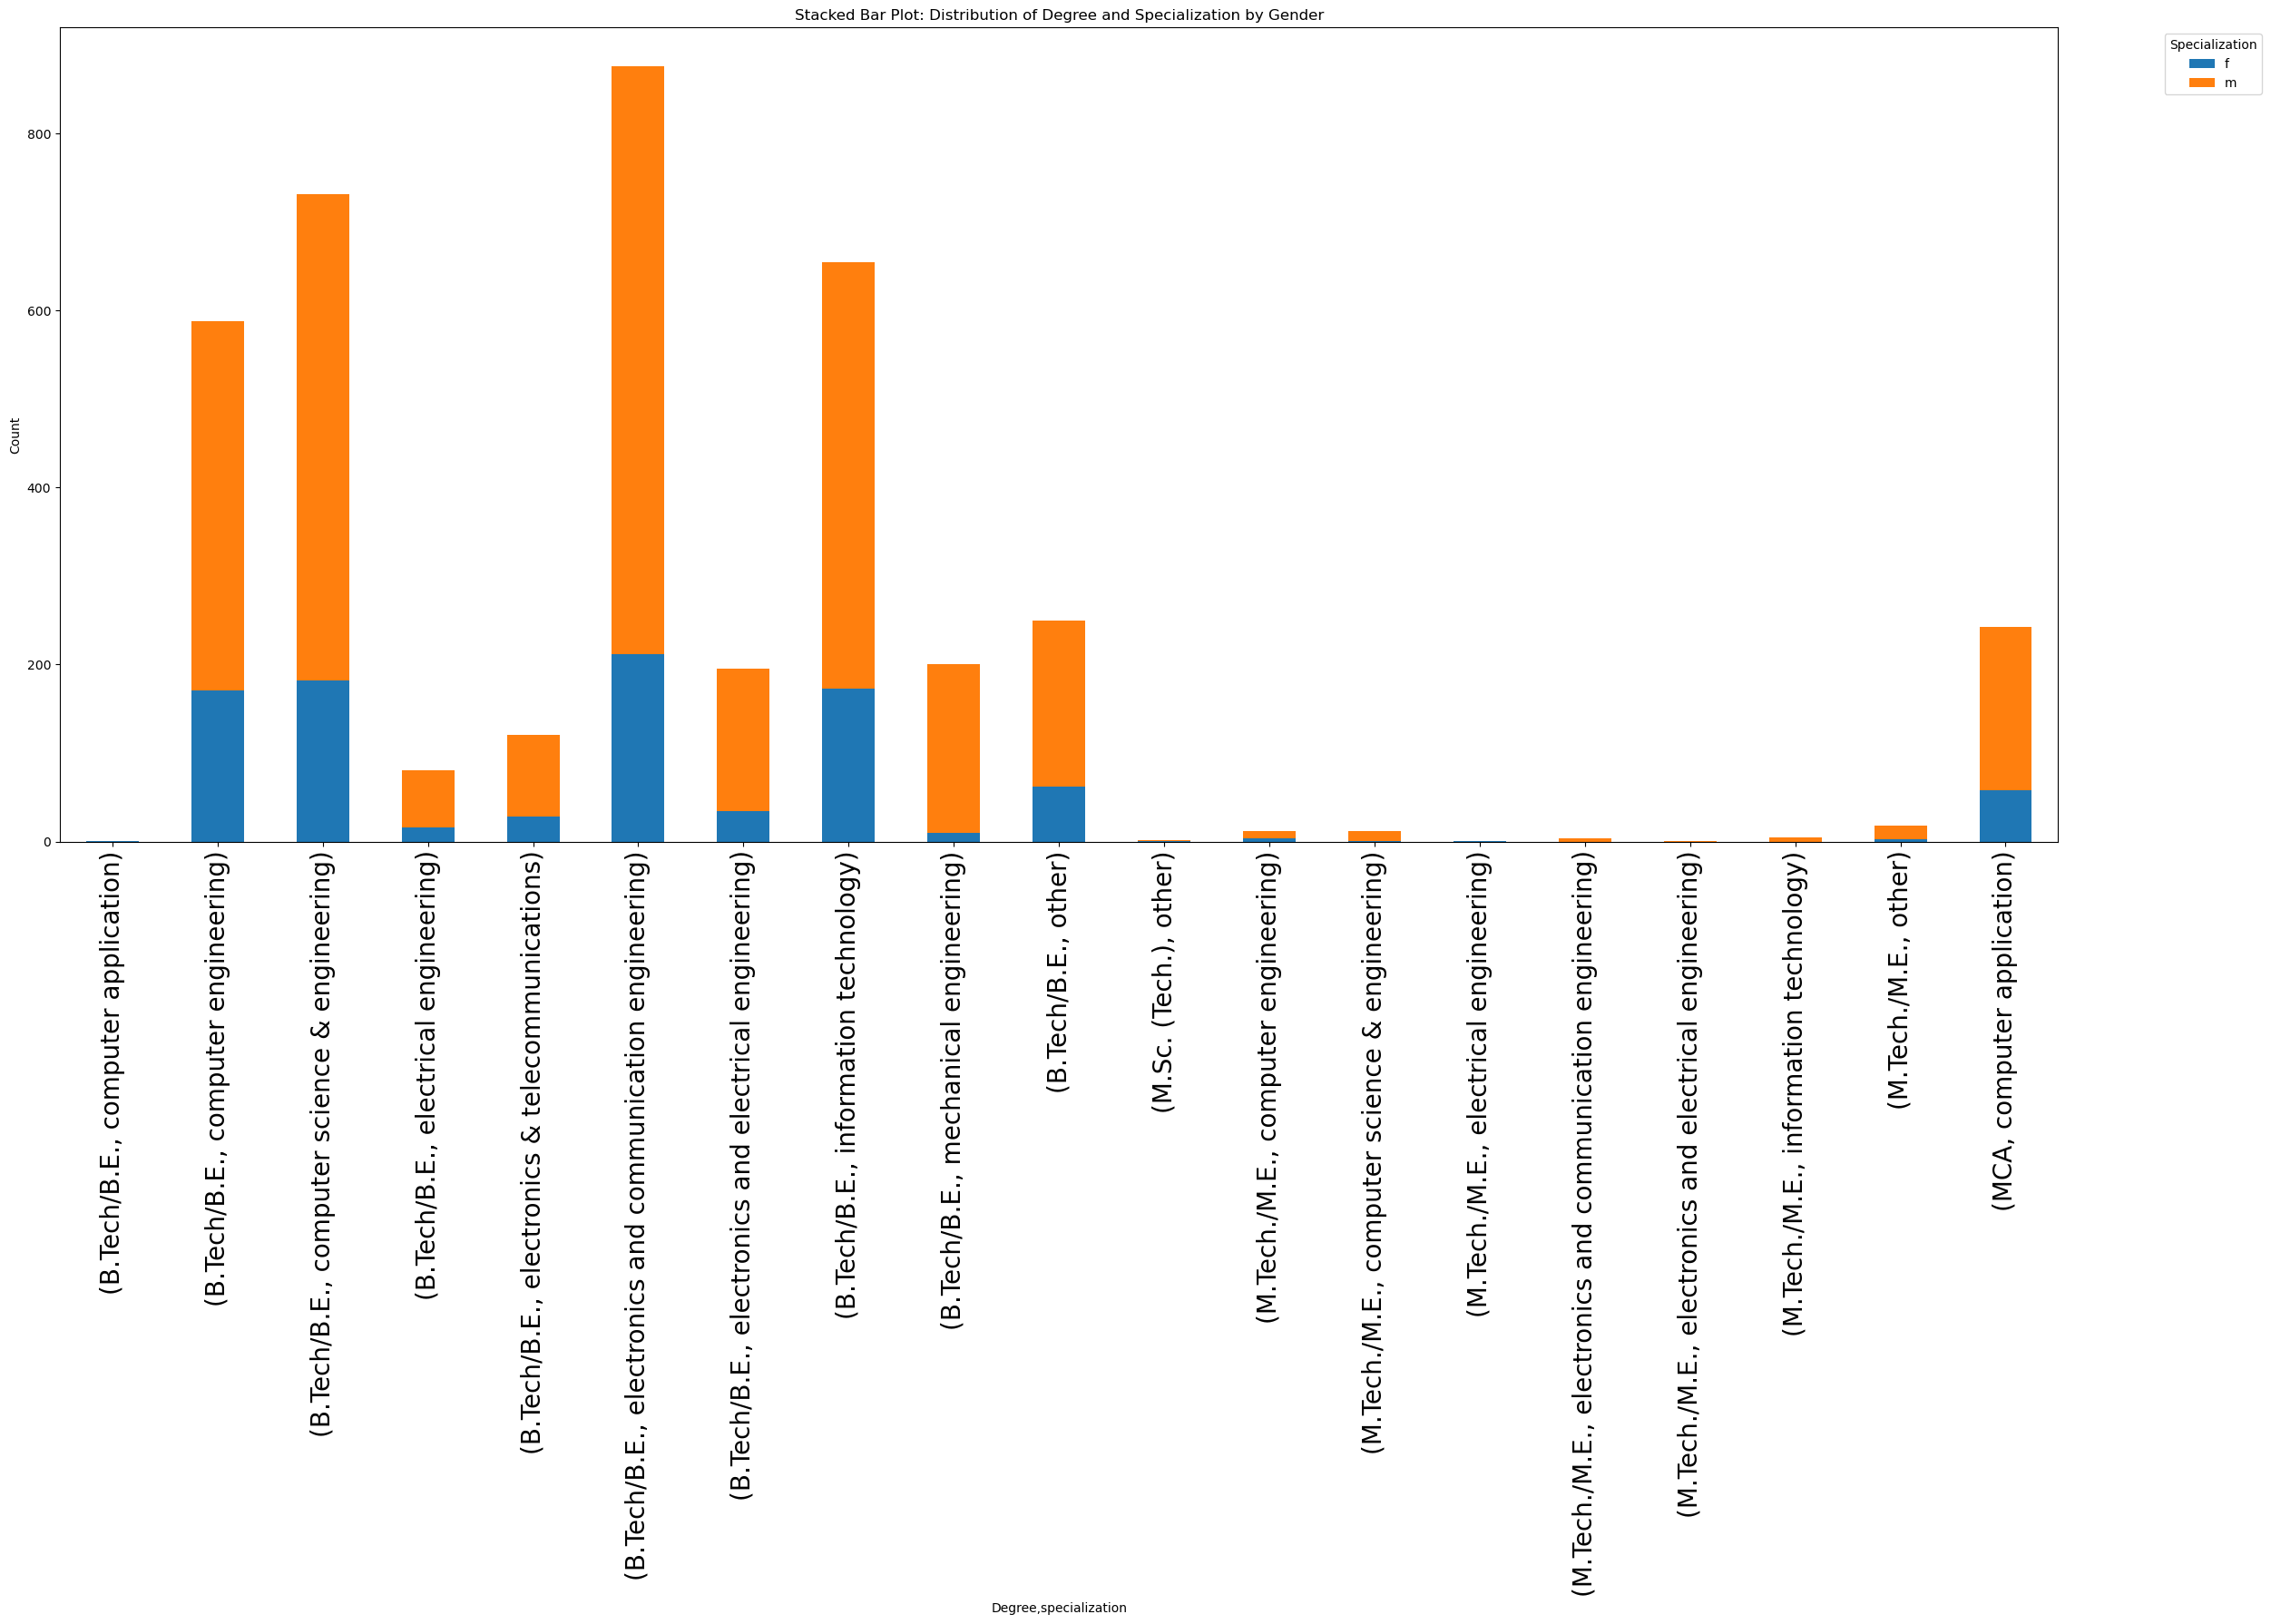

In [96]:
cross_tab = pd.crosstab(index=[df['Degree'], df['Specialization']], columns=df['Gender'])
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(25,18))
plt.xlabel('Degree,specialization')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Distribution of Degree and Specialization by Gender')
plt.xticks(fontsize=20)  
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [97]:
cross_tab 

Gender                                                     f    m
Degree        Specialization                                     
B.Tech/B.E.   computer application                         1    0
              computer engineering                       171  417
              computer science & engineering             182  550
              electrical engineering                      16   65
              electronics & telecommunications            28   93
              electronics and communication engineering  212  664
              electronics and electrical engineering      34  161
              information technology                     173  482
              mechanical engineering                      10  191
              other                                       62  188
M.Sc. (Tech.) other                                        1    1
M.Tech./M.E.  computer engineering                         4    8
              computer science & engineering               1   11
              electrical engineering                       1    0
              electronics and communication engineering    0    4
              electronics and electrical engineering       0    1
              information technology                       0    5
              other                                        3   15
MCA           computer application                        58  185

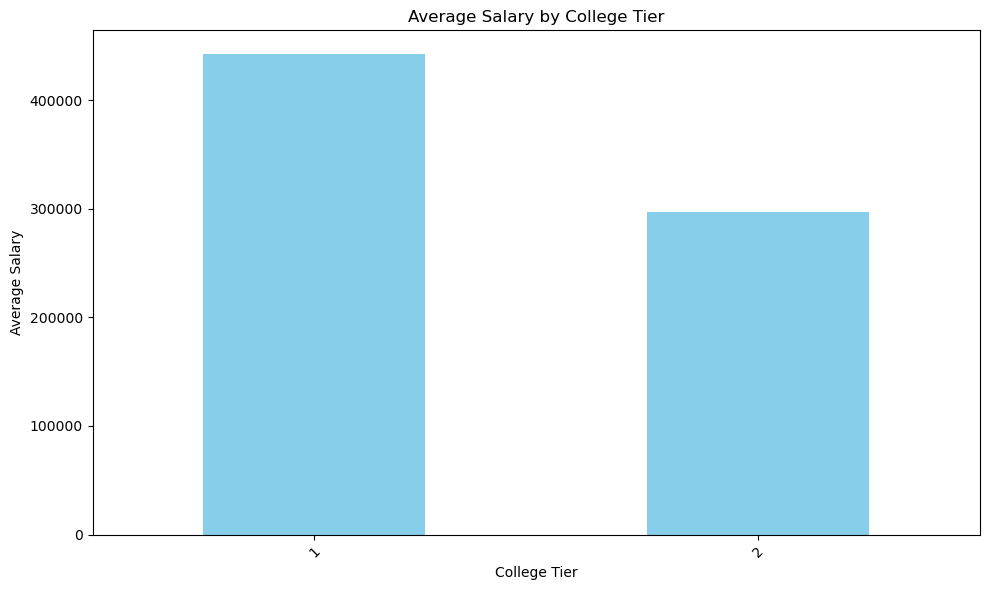

In [98]:
average_salary_by_tier = df.groupby('CollegeTier')['Salary'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
average_salary_by_tier.plot(kind='bar', color='skyblue')
plt.xlabel('College Tier')
plt.ylabel('Average Salary')
plt.title('Average Salary by College Tier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Observation:
College within Tier 1 offers high salary as compared to the colleges in TIer 2. Colleges in Tier 2
offers below overall average salary.


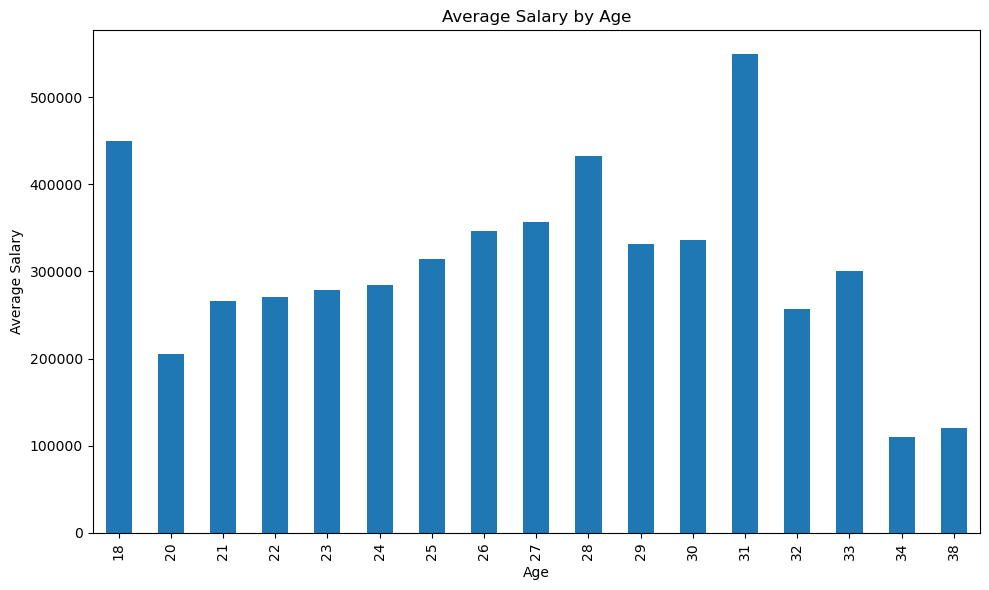

In [99]:
average_salary_by_age = df.groupby('Age')['Salary'].mean()
plt.figure(figsize=(10, 6))
average_salary_by_age.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Average Salary by Age')
plt.tight_layout()
plt.show()


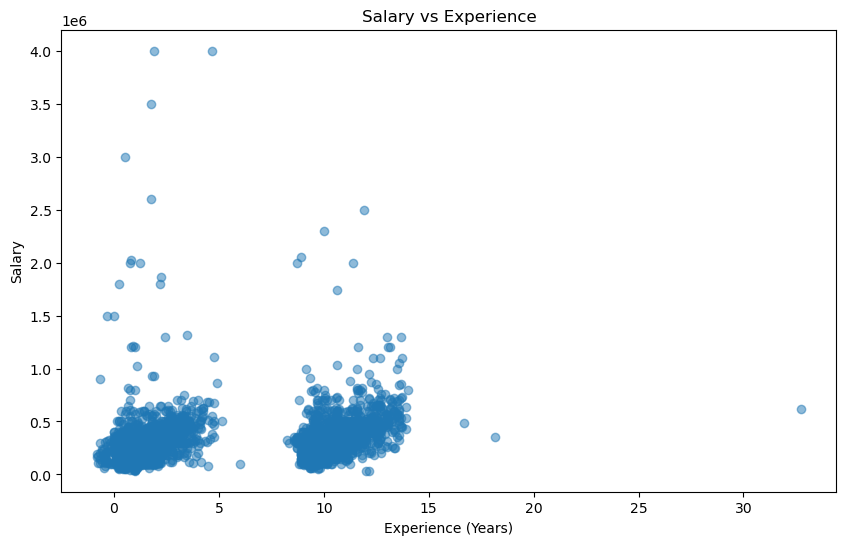

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Experience'], df['Salary'], alpha=0.5)
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.title('Salary vs Experience') 
plt.show()


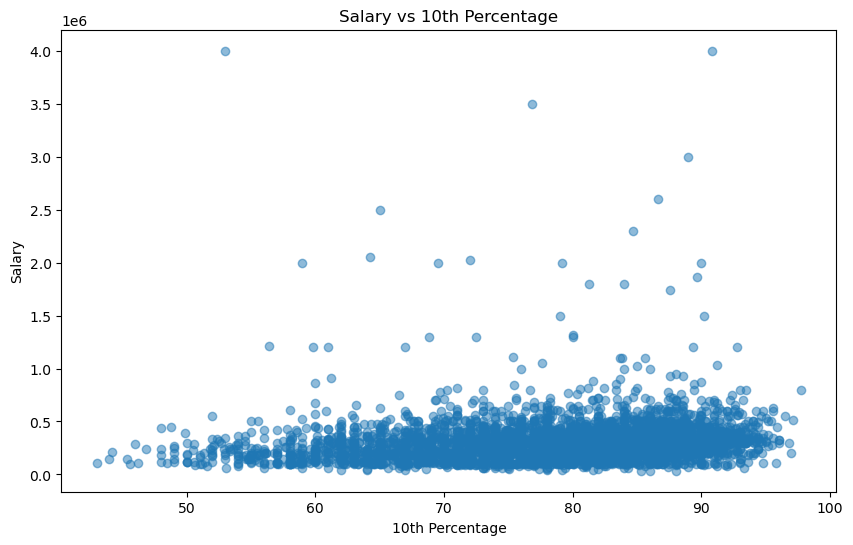

In [101]:
plt.figure(figsize=(10, 6))
plt.scatter(df['10percentage'], df['Salary'], alpha=0.5)
plt.xlabel('10th Percentage')
plt.ylabel('Salary')
plt.title('Salary vs 10th Percentage')
plt.show()


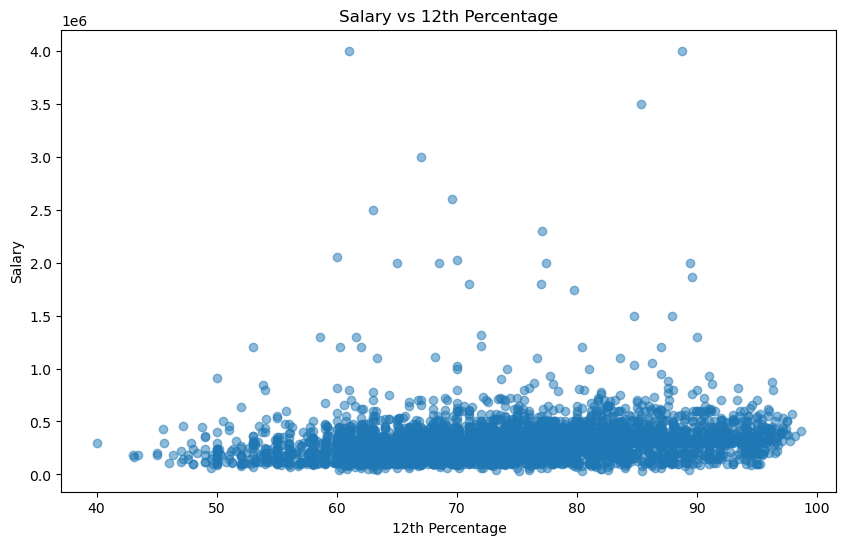

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(df['12percentage'], df['Salary'], alpha=0.5)
plt.xlabel('12th Percentage')
plt.ylabel('Salary')
plt.title('Salary vs 12th Percentage')
plt.show()


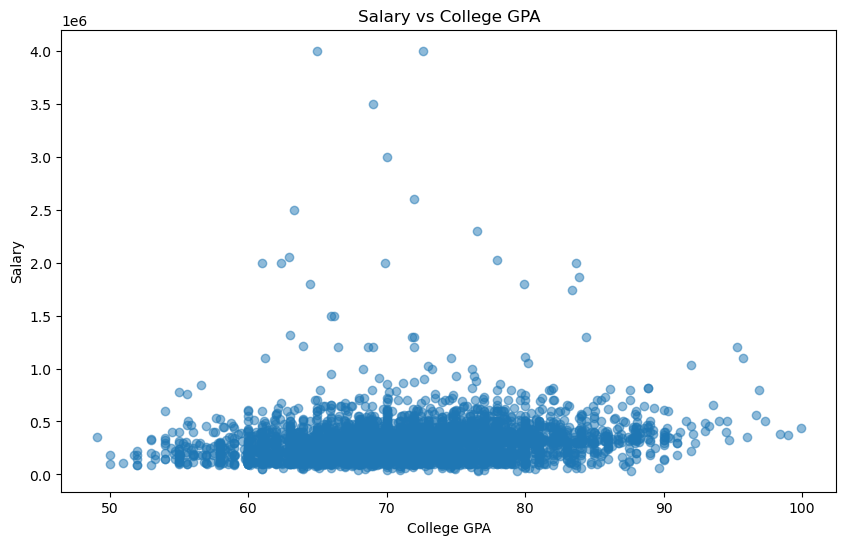

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(df['collegeGPA'], df['Salary'], alpha=0.5)
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.title('Salary vs College GPA')
plt.show()


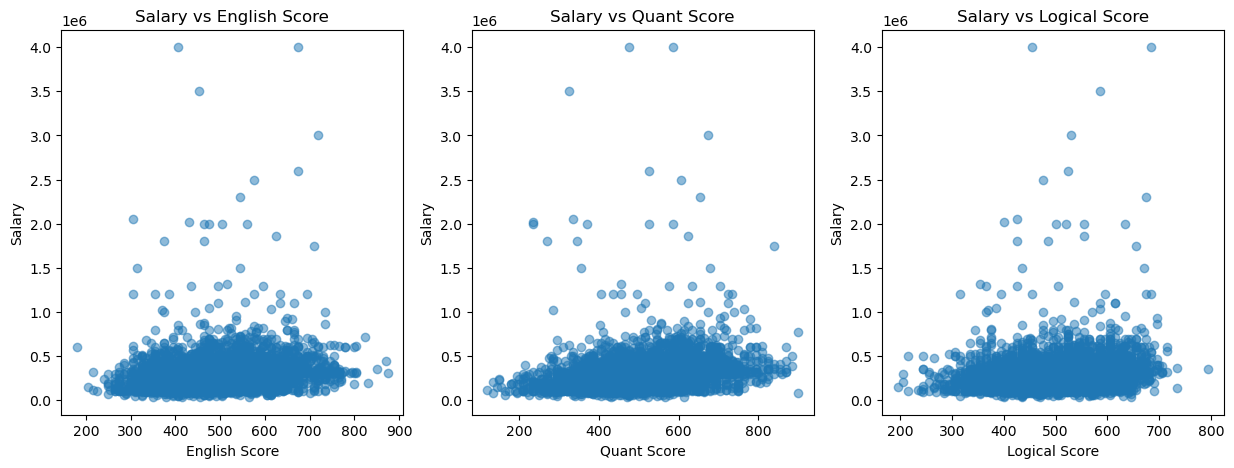

In [104]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# English vs Salary
axes[0].scatter(df['English'], df['Salary'], alpha=0.5)
axes[0].set_xlabel('English Score')
axes[0].set_ylabel('Salary')
axes[0].set_title('Salary vs English Score')


# Quant vs Salary
axes[1].scatter(df['Quant'], df['Salary'], alpha=0.5)
axes[1].set_xlabel('Quant Score')
axes[1].set_ylabel('Salary')
axes[1].set_title('Salary vs Quant Score')


# Logical vs Salary
axes[2].scatter(df['Logical'], df['Salary'], alpha=0.5)
axes[2].set_xlabel('Logical Score')
axes[2].set_ylabel('Salary')
axes[2].set_title('Salary vs Logical Score')

plt.show()


Observation:
There does not exist any correlation 
The scatters plots above gives adequate evidence that salary is not effected by any of the above scores

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


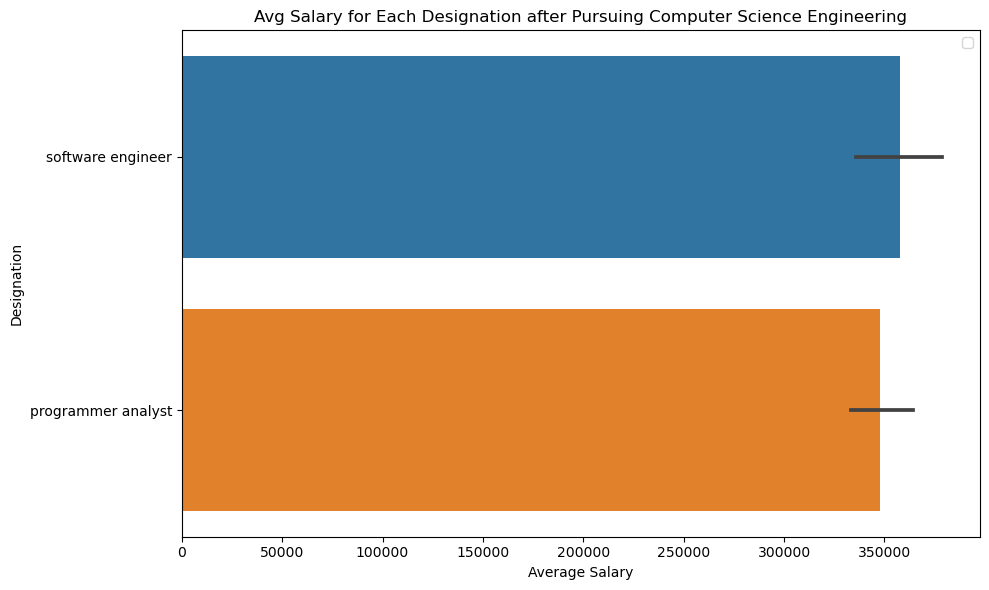

In [105]:
df['Designation'] =df['Designation'].replace([
    'programmer analyst trainee', 'programmer analyst'
], 'programmer analyst'
)

df['Designation'] =df['Designation'].replace([
    'software eng', 'software engg', 'software engineer', 'software engineere', 'software enginner'
], 'software engineer'
)

df2 = df[(df["Designation"].isin(["programmer analyst", "software engineer", "hardware engineer", "associate engineer"])) &
                (df["Specialization"].isin(["computer science & engineering", "computer engineering"]))]
plt.figure(figsize=(10, 6))
sns.barplot(y='Designation', x='Salary',data=df2)
            
plt.title('Avg Salary for Each Designation after Pursuing Computer Science Engineering')
plt.xlabel('Average Salary')
plt.ylabel('Designation')
plt.legend()
plt.tight_layout()
plt.show()


In [106]:
df['GraduationYear'] = pd.to_datetime(df['GraduationYear'], format='%Y')  
df['DOJYear'] = df['DOJ'].dt.year
df['GraduationYear'] = df['GraduationYear'].dt.year
df['IsFresher'] = (df['DOJYear'] == df['GraduationYear']).astype(int)
df['HasCareerGap'] = (df['DOJYear'] != df['GraduationYear']).astype(int)
df[['DOJYear', 'GraduationYear', 'IsFresher', 'HasCareerGap']]


DOJYear  GraduationYear  IsFresher  HasCareerGap
0        2012            2011          0             1
1        2013            2012          0             1
2        2014            2014          1             0
3        2011            2011          1             0
4        2014            2012          0             1
...       ...             ...        ...           ...
3993     2011            2010          0             1
3994     2013            2013          1             0
3995     2013            2012          0             1
3996     2014            2014          1             0
3997     2013            2012          0             1

[3998 rows x 4 columns]

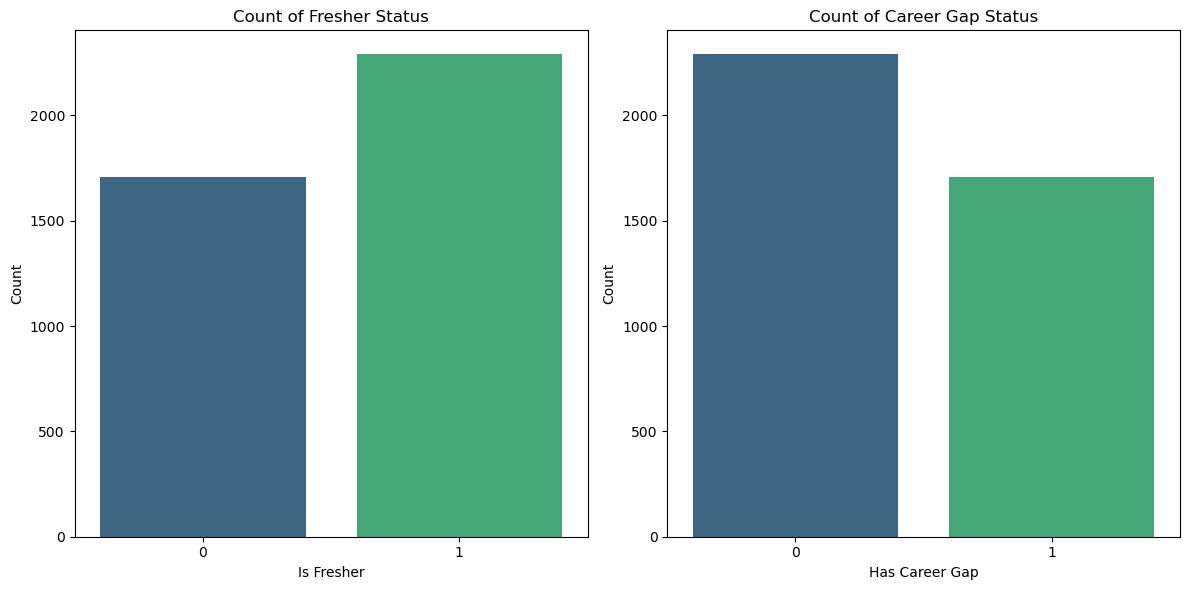

In [107]:
plt.figure(figsize=(12, 6))

# Plotting countplot for 'IsFresher' column
plt.subplot(1, 2, 1)
sns.countplot(x='IsFresher', data=df, palette='viridis')
plt.xlabel('Is Fresher')
plt.ylabel('Count')
plt.title('Count of Fresher Status')

# Plotting countplot for 'HasCareerGap' column
plt.subplot(1, 2, 2)
sns.countplot(x='HasCareerGap', data=df, palette='viridis')
plt.xlabel('Has Career Gap')
plt.ylabel('Count')
plt.title('Count of Career Gap Status')

plt.tight_layout()
plt.show()


In [108]:
df['IsFresher'].value_counts()

1    2289
0    1709
Name: IsFresher, dtype: int64

Observation:
The majority are categorized as "No Career Gap," implying that they transitioned directly from
education to employment without any significant gap.There's a comparatively smaller count of
individuals categorized as having a "Career Gap"
